In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
print('Mevcut Konum:', os.getcwd())
os.chdir('C:\\Users\\sahik\\Documents\\GitHub\\MachineLearning101\\data')
print('Güncel Konum:', os.getcwd())

Mevcut Konum: C:\Users\sahik\Documents\GitHub\MachineLearning101\DataCleaning-DataVisualization
Güncel Konum: C:\Users\sahik\Documents\GitHub\MachineLearning101\data


In [3]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Veri seti google play store da yer alan uygulamaların bilgilerini içermektedir.
* **App:** Uygulama Adı
* **Category:** Kategorisi - ART_AND_DESIGN, FINANCE, COMICS, BEAUTY...
* **Rating:** Reyting - Derecelendirme: Uygulamanın Google Play'deki mevcut ortalama puanı (5 üzerinden) 
* **Reviews:** İnceleme Sayısı -  Verilen kullanıcı incelemelerinin sayısı
* **Size:** Uygulamanın boyutu (MB)
* **Installs:** İndirilme sayısı
* **Type:** Tür - Ücretli, Ücretsiz
* **Price:** Fiyat - ABD Doları cinsinden
* **Content Rating:** Uygulama hangi yaş grubuna hitap ediyor
* **Last Updated:** Son güncellenme tarihi

In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

<div class='alert alert-block alert-danger'> 
Yukarıda kolon isimlerine baktığımızda iki kelimeden oluşan ve aralarında boşluk olan kolonlar var. Bu kolonlar bizlere ilerde sorun yaratabilir. Bu boşluklar yerine '_' ekleyelim.
</div>

In [5]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [6]:
df.shape

(10841, 13)

<div class='alert alert-block alert-info'>
    <b>'shape'</b> komutu ile veri setindeki satır ve sütun sayılarını elde ediyoruz. Verimizin 10841 satır ve 13 sütundan oluştuğunu görüyoruz. Veri analizinde satırlara <b>örneklem</b> sütunlara ise <b>öznitelik</b> denir.</li>
</div>

In [7]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object

<div class='alert alert-block alert-warning'>
    <b>'dtypes'</b> komutu ile veri setindeki sütunların veri tiplerini elde ediyoruz. Burada reytingin float tipinde olduğunu diğer kolonların ise obje tipinde olduğunu görüyoruz. Ancak size ve installs gibi kolonların da sayısal tipte olması gerekir. Bunları sayısal tipe çevirmamiz gerekiyor.
</div>

### Eksik Veriler

In [8]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

 Grafiklerin daha iyi görünmesi için **set_theme()** metodunu kullanıyoruz.

In [12]:
sns.set_theme() 
sns.set(rc={'figure.dpi':300, 'figure.figsize':(12,9)}) 
# grafik kalitesini 300 ve grafik boyutunu 12ye 9 şeklinde ayarlıyoruz.

<AxesSubplot:>

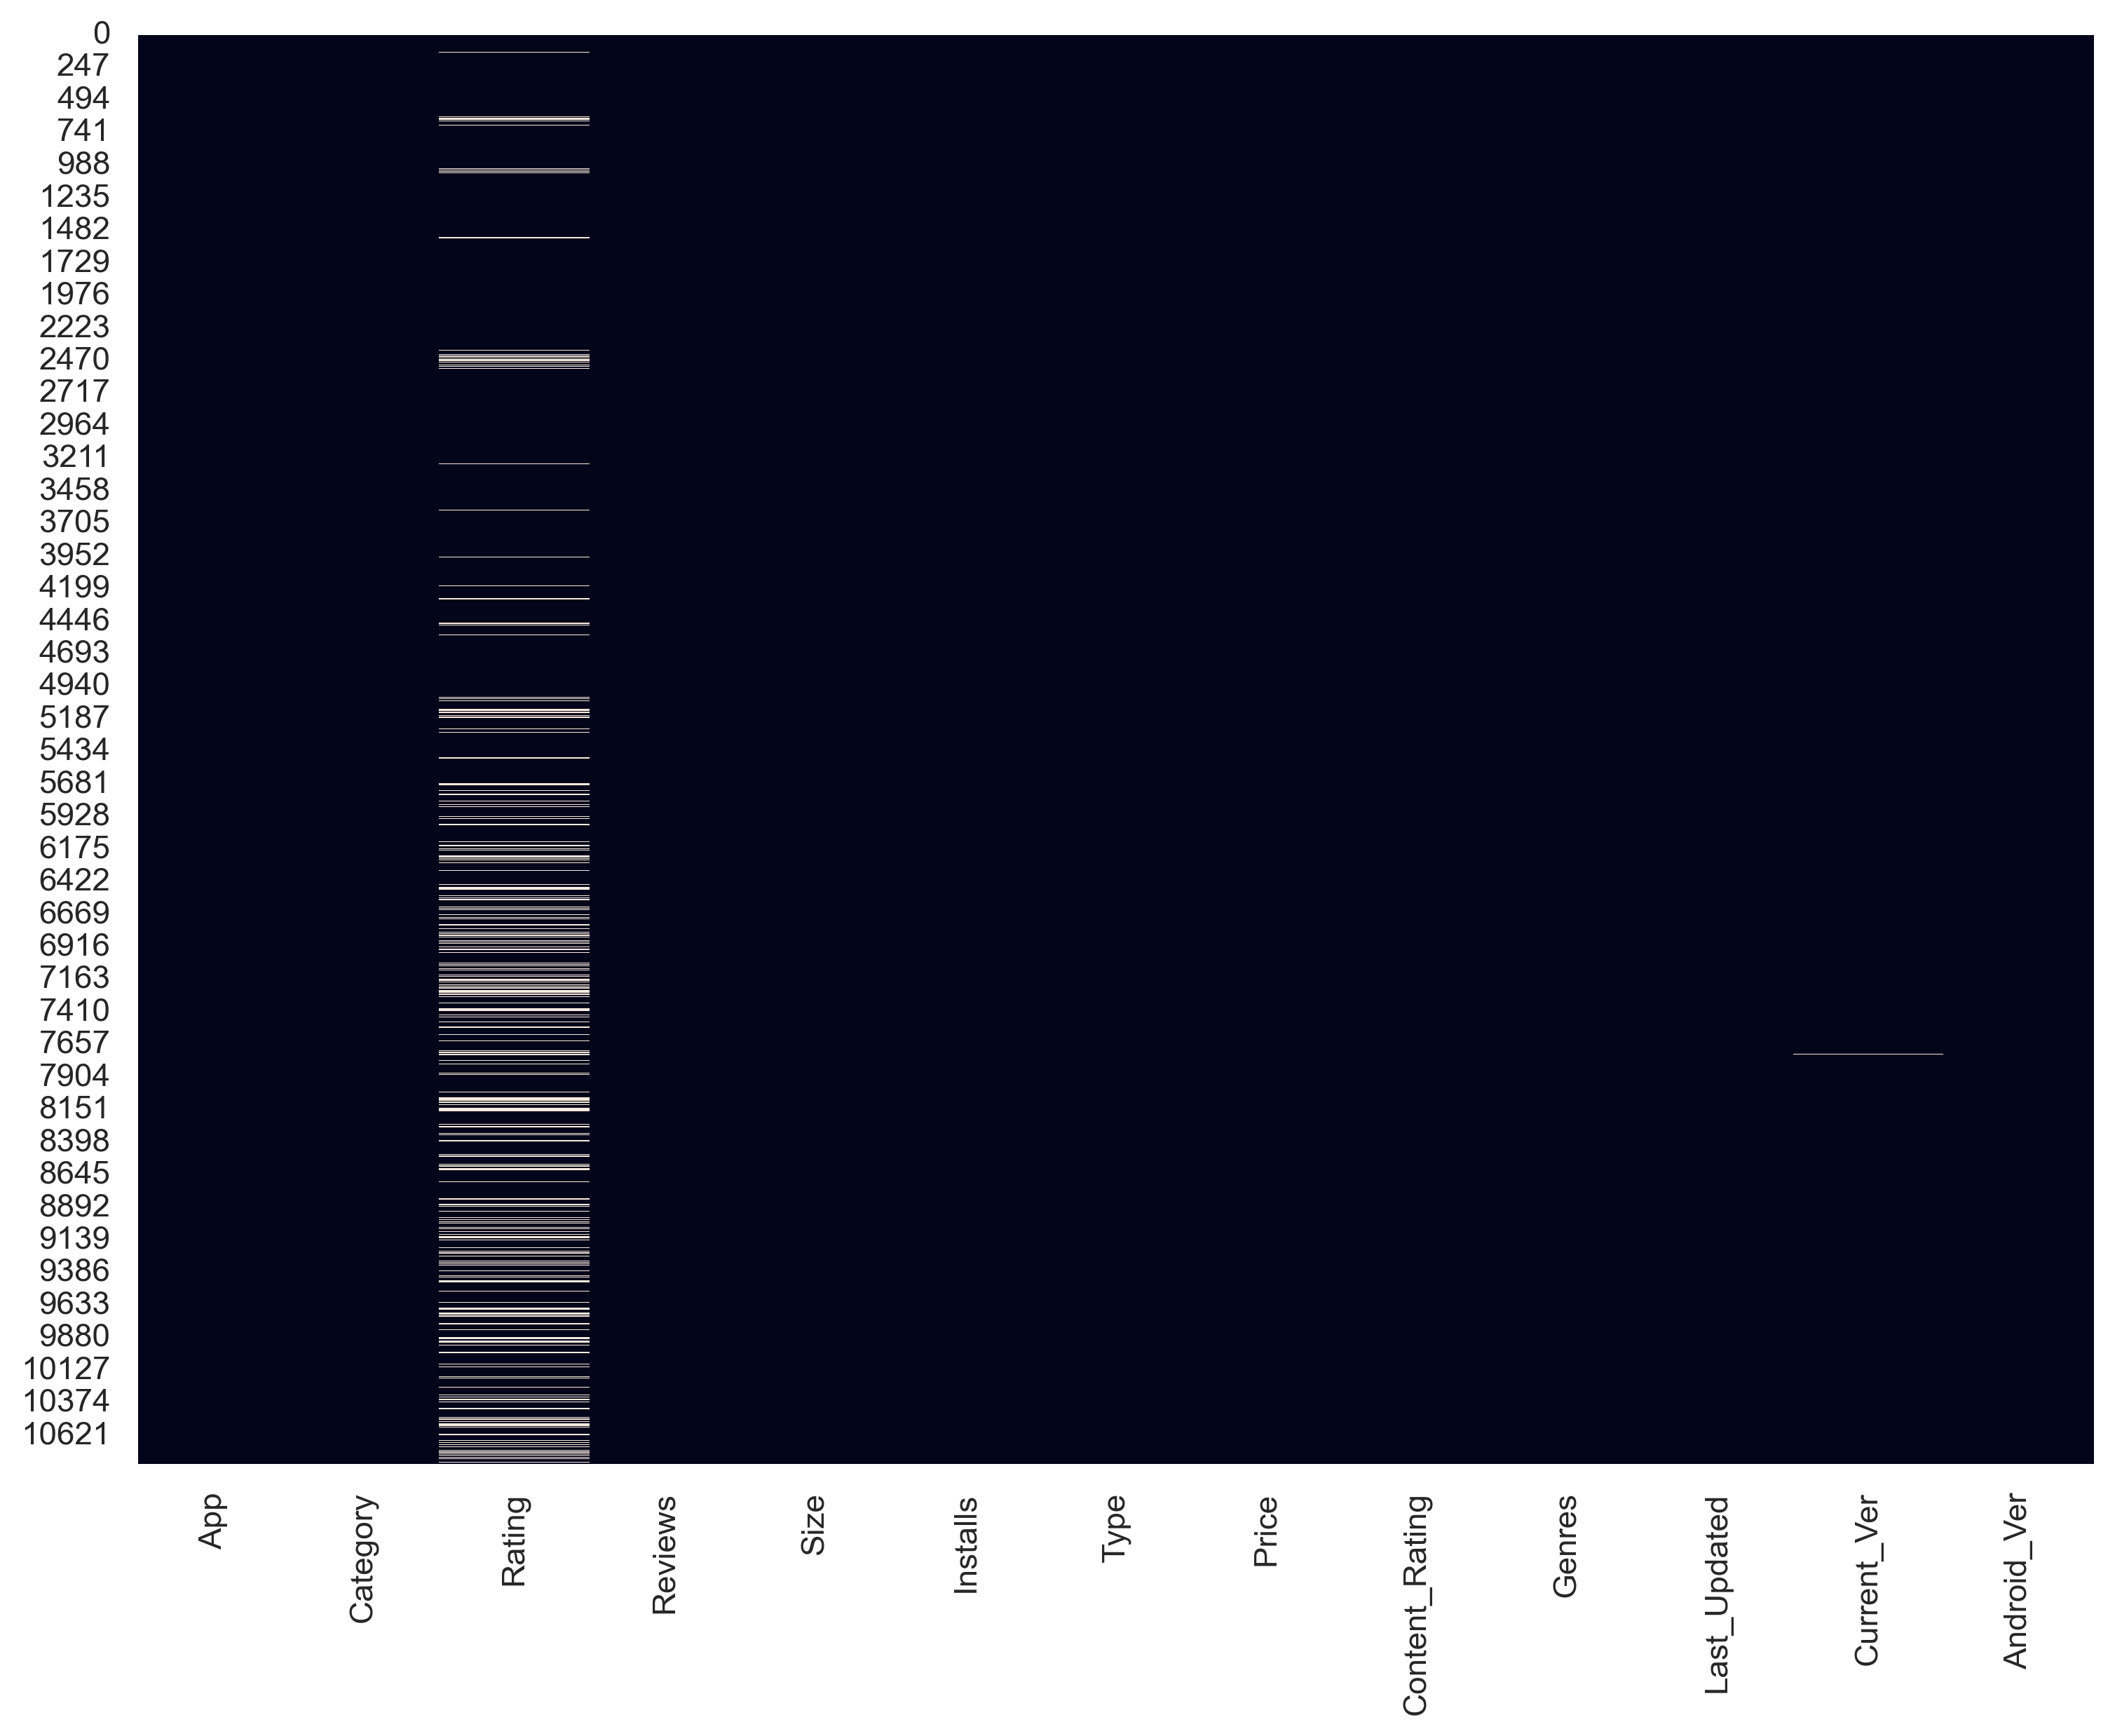

In [13]:
sns.heatmap(df.isnull(), cbar=False) # cbar ile renk çubuğunun çizilip çizilmeyeceğini belirliyoruz.

Grafiğe baktığımızda 'Rating' ve 'Curren_Ver' kolonlarındaki eksik verileri görebiliyoruz. Bu eksik verilere müdehale etmenin çeşitleri yolları bulunmaktadır.
* Eksik verilerin bulunduğu satırları kaldırabiliriz. Bu yol veri kaybına yol açtığı için pek tavsiye edilmez.
* Eksik veriler yerine kolonun ortalmasını ya da medyanını ekleyebiliriz. Ancak veri setinde aykırı değer olabileceğinden ortalama yerine medyan eklemek daha mantıklı bir yaklaşım olacaktır. Çünkü medyan aykırı değerlere karşı daha dayanıklıdır.

In [16]:
rating_median = df.Rating.median()
rating_median

4.3

**filna()** metodu ile eksik verilere kolonun medyan değerini ekleyelim.

In [15]:
df.Rating.fillna(rating_median, inplace=True)

<mark>Curren_Ver</mark> kolonundaki eksik değer sayısı oldukça az olduğundan dolayı bu verilerin olduğu satırları silmek herhangi bir sorun teşkil etmeyecektir.

**dropna()** metodu ile eksik verileri silelim.

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum().sum()

0

<div class='alert alert-block alert-success'>
<b>df.isnull().sum().sum()</b> ifadesi ile önce isnull() metodu ile eksik verileri True-False şeklinde ifade ediyoruz. Daha sonra sum() metodu ile her kolondaki eksik değerlerin sayısını elde ediyoruz. Bir kez daha sum() metodunu kullandığımız da ise verisetindeki toplam eksik değer sayısnı elde ediyoruz.
</div>

**info()** metodu ile veri seti hakkında özet bilgileri elde ediyoruz.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content_Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last_Updated    10829 non-null  object 
 11  Current_Ver     10829 non-null  object 
 12  Android_Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


Yine yukarda belirttiğimiz gibi object tipindeki bazı sütunların sayısal tipinde olması gerekiyor. Bu sütunlar için dönüşüm gerçekleştirelim.

Öncelikle **describe()** metodu ile bu sütunların istatistiksel özelliklerini gözlemleyelim.

In [21]:
 df.Reviews.describe()

count     10829
unique     5999
top           0
freq        594
Name: Reviews, dtype: object

Bu sütunda;
* 10829 tane değer var.
* 5999 tane benzersiz(tek) değer var. 
* En çok 0 değeri var.
* Bu sıfırlar 594 defa tekrar etmiş.

> Bu object tiple tanımlanmış Reviews sütununu **astype()** metodu ile int'a çevirelim.

In [22]:
df.Reviews = df.Reviews.astype('int64')

In [24]:
df.Reviews.describe().round() # Değeri 1 ler basamağına yuvarlamak için round() metodunu kullanıyoruz.

count       10829.0
mean       444602.0
std       2929213.0
min             0.0
25%            38.0
50%          2100.0
75%         54815.0
max      78158306.0
Name: Reviews, dtype: float64

Sütunun istatiksel hesaplamalarına tekrar baktığımızda artık int tipli olan sütunun describe çıktısında ortalma standart sapma min max gibi değerler karşımıza çıkıyor.

* Verinin ortalmasını(mean) 444602 ve ortanca değeri(50%) 2100 olarak elde ettik. Buradan verinin ortalamasının medyandan büyük olduğu sonucu elde ediyoruz. Standart sapma ve max değeri de ortalama değerden oldukça yüksek. Bu özet istatistiklerine baktığımız da bu sütunda aykırı değerlerin olduğunu söyleyebiliyoruz.

Şimdide Size sütununa bakalım. Size sütunu bize uygulamaların boyutunu MB cinsinden veriyordu. Bu sütundaki benzersiz(tek) değerleri gözlemlemek için **unique()** metodunu kullanalım.

In [27]:
print('Benzersiz değer sayısı:', len(df.Size.unique()))

df.Size.unique()

Benzersiz değer sayısı: 457


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Bu sütunda 457 tane benzersiz değer bulunmaktadır ve sütundaki **'M'** değerleri megabaytı, **'k'** değerleri ise kilobaytı göstermektedir. Ayrıca kolon içerisinde **'Varies with device'** şeklinde bir metin ifadesi olduğunu da görüyoruz.

Öncelikle bu değerlerde ki **M** ve **k** ifadelerini kaldıralım.

In [28]:
df.Size.replace('M', '', regex=True, inplace=True)
df.Size.replace('k', '', regex=True, inplace=True)
# regex=True - Regular yani düzenli ifadeler kullanabilmeyi sağlar.

In [29]:
df.Size.unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '5.5', '17', '39', '31', '4.2', '7.0',
       '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '201', '3.6', '5.7', '8.6', '2.4', '27',
       '2.7', '2.5', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4',
       '18', '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6',
       '7.1', '3.7', '22', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9',
       '9.5', '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2',
       '2.1', '42', '7.3', '9.1', '55', '6.5', '1.5', '7.5', '51', '41',
       '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8', '8.8',
       '6.6', '5.1', '61', '66', '79', '8.4', '118', '44', '695', '1.6',
       '6.2', '53', '1.4', '3.0', '5.8', '3.8', '9.6', '45', '63', '49',
       '77', '4.4', '4.8', '70', '6.9', '9.3', '10.0', '8.1', '36',

Şimdi de sütundaki **'Varies with device'** ifadesi yerine sütunun median değerini ekleyelim. Median değerini hesaplayabilmek için object tipindeki Size sütunundan 'Varies with device' ifadelerini çıkartmamız daha sonra sütunu sayısal bir değere çevirmemiz gerekiyor.

In [30]:
size_median = df[ df.Size!='Varies with device' ].Size.astype(float).median()
size_median

15.0

In [31]:
df.Size.replace('Varies with device', size_median, inplace=True)

In [32]:
df.Size = pd.to_numeric(df.Size)  # Size sütununu numeric bir değere çevirdik.

In [33]:
df.Size.head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

In [34]:
df.Size.describe().round()

count    10829.0
mean        34.0
std         91.0
min          1.0
25%          7.0
50%         15.0
75%         28.0
max       1020.0
Name: Size, dtype: float64

Şimdi de **Instalss** sütununu inceleyelim.

In [35]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

Burada hem artı hemde rakalmar arasıdaki virgül değerlerini kaldıralım.

In [36]:
df.Installs = df.Installs.apply(lambda x:x.replace('+', ''))
df.Installs = df.Installs.apply(lambda x:x.replace(',', ''))
df.Installs = df.Installs.apply(lambda x:int(x)) # değerleri int tipine çeviriyoruz.

In [37]:
df.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

Şimdi de **Instalss** sütununu inceleyelim.

In [38]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Burada $ işaretini kaldırıp object tipini numerik bir tip yapmamız gerekiyor.

In [39]:
df.Price = df.Price.apply(lambda x:x.replace('$',''))
df.Price =  df.Price.apply(lambda x:float(x)) # değerleri float tipine çeviriyoruz.

In [40]:
df.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

 Şimdi de **'Genres'** sütununu ele alalım.

In [42]:
len(df.Genres.unique()) # öncelikle kaç tane benzersiz değeri olduğuna bakalım.

119

In [43]:
df.Genres.head(10)

0                 Art & Design
1    Art & Design;Pretend Play
2                 Art & Design
3                 Art & Design
4      Art & Design;Creativity
5                 Art & Design
6                 Art & Design
7                 Art & Design
8                 Art & Design
9      Art & Design;Creativity
Name: Genres, dtype: object

Çıktıyı incelediğimizde bazı satırların ';' ile ayrıldığını görüyoruz. İk değer Genre yani türü ikinci değer ise alt kategoriyi gösteriyor. Öncelikle bu iki değeri ayıralım ve Genre değerini alalım.

In [44]:
df.Genres = df.Genres.str.split(';').str[0]
# İfadeyi ";" e göre parçalauıp daha sonra parçaların ilk ifadesini alıyoruz.

In [45]:
len(df.Genres.unique()) 

48

Benzersiz değerler daha önce 119 iken şuan da 48 e düştü.

In [46]:
df.Genres.unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

Bu sütundaki her bir grubun (benzersiz değerin) sayısına bakalım.

In [47]:
df.Genres.value_counts()

Tools                      841
Entertainment              666
Education                  644
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            390
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Dating                     234
Books & Reference          233
Simulation                 218
Video Players & Editors    178
Puzzle                     166
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                   110
Adventure                   91
House & 

Son satıra baktığımızda Music 25, Music & Audio ise 1 değerden oluşmaktadır. Music & Audio değerini de Music kategorisine ekleyelim.

In [48]:
df.Genres.replace('Music & Audio', 'Music', inplace=True)

Son olarak **Last_Updated** sütununu ele alalım.

In [49]:
df.Last_Updated.head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last_Updated, dtype: object

Görüldüğü üzere tarih değerlerini barındıran bu sütun object tipinde tanımlanmış. Tarih işlemlerini daha kolay yapabilmek adına bu sütunu **datetime** tipine çevirelim.

In [50]:
df.Last_Updated = pd.to_datetime(df.Last_Updated)

<div class='alert alert-block alert-info'>
<b>Buraya kadar veri temizleme ve veri ön işleme adımlarını gerçekleştirdik.</b> Verisetimizin son halini gözlemleyelim.
</div>

In [51]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4 and up


In [52]:
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content_Rating            object
Genres                    object
Last_Updated      datetime64[ns]
Current_Ver               object
Android_Ver               object
dtype: object

# Veri Görselleştirme

> <mark><b>Ücretli ve Ücretsiz ugulamaların sayısına bakalım.</b></mark>

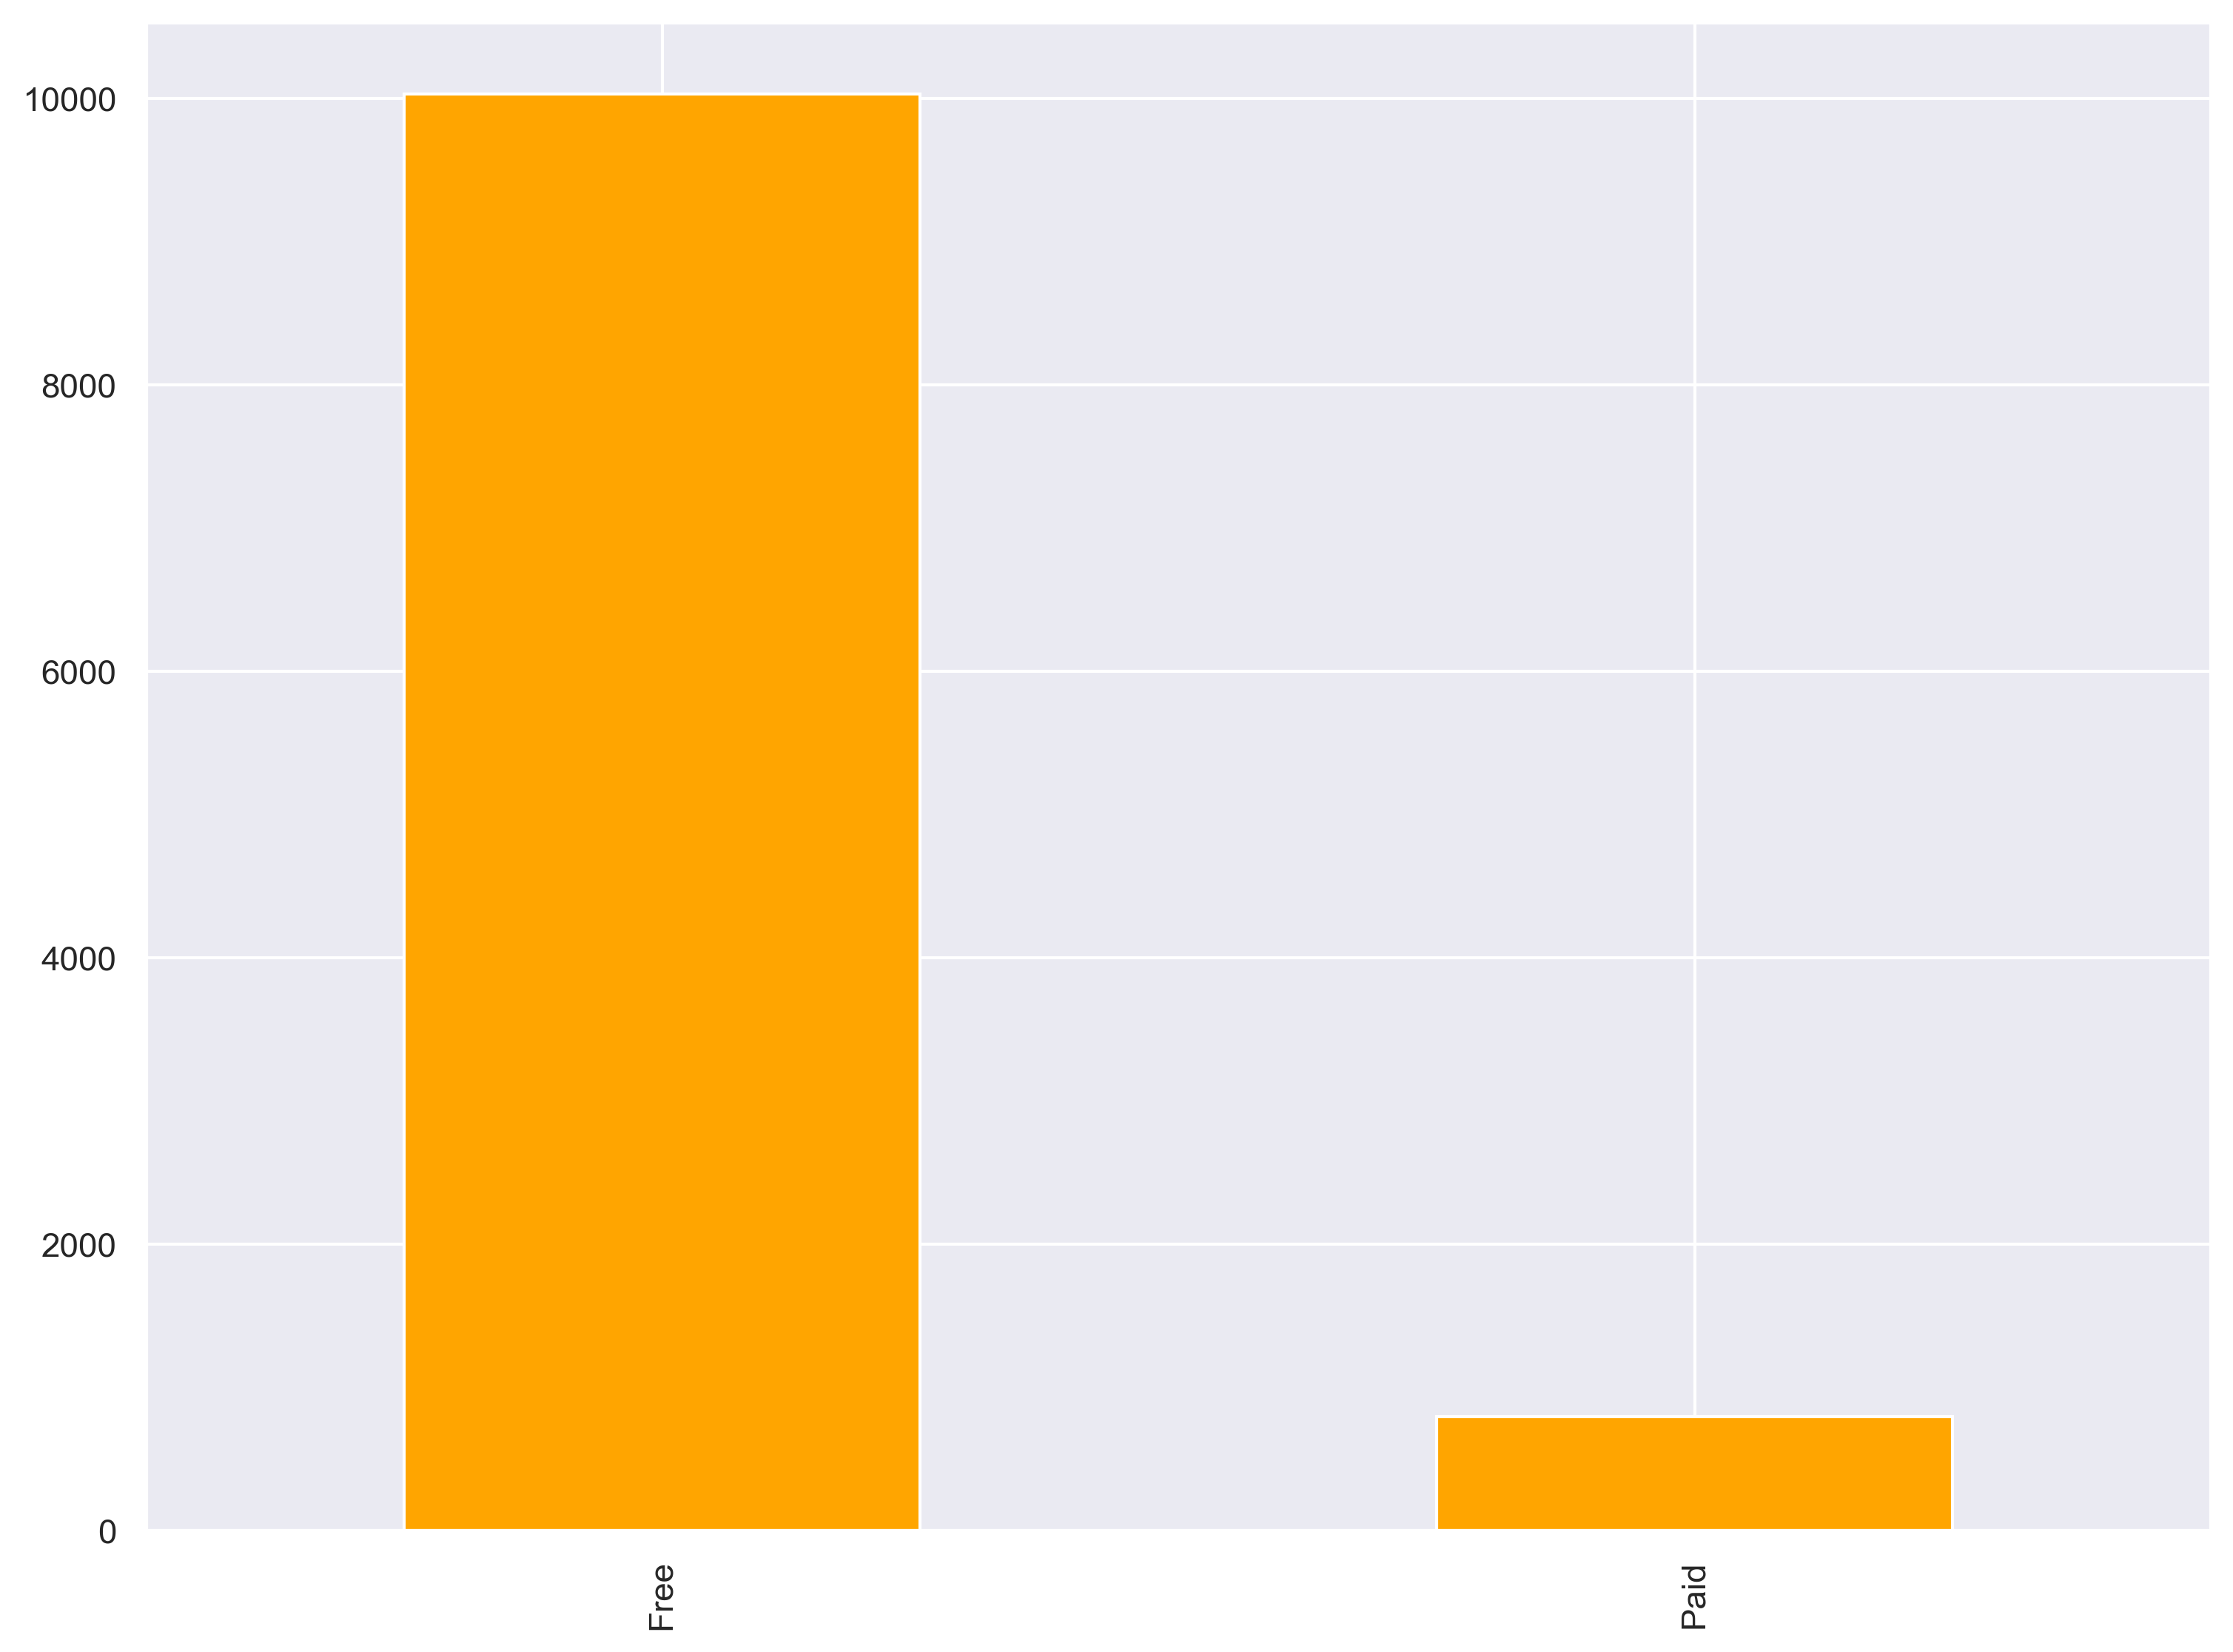

In [56]:
# value_counts() ile her bir kategorinin sayısını hesaplıyoruz.
# plot ile bu kategori sayılarını grafiğe döküyoruz.

df.Type.value_counts().plot(kind='bar', color='orange');

Ücretsiz uygulamalar ücretli uygulamalara göre daha fazla..

> <mark><b>Ücretli ve Ücretsiz versiyonların Reytinglerinin kutu grafiğini gözlemleyelim. </b></mark>

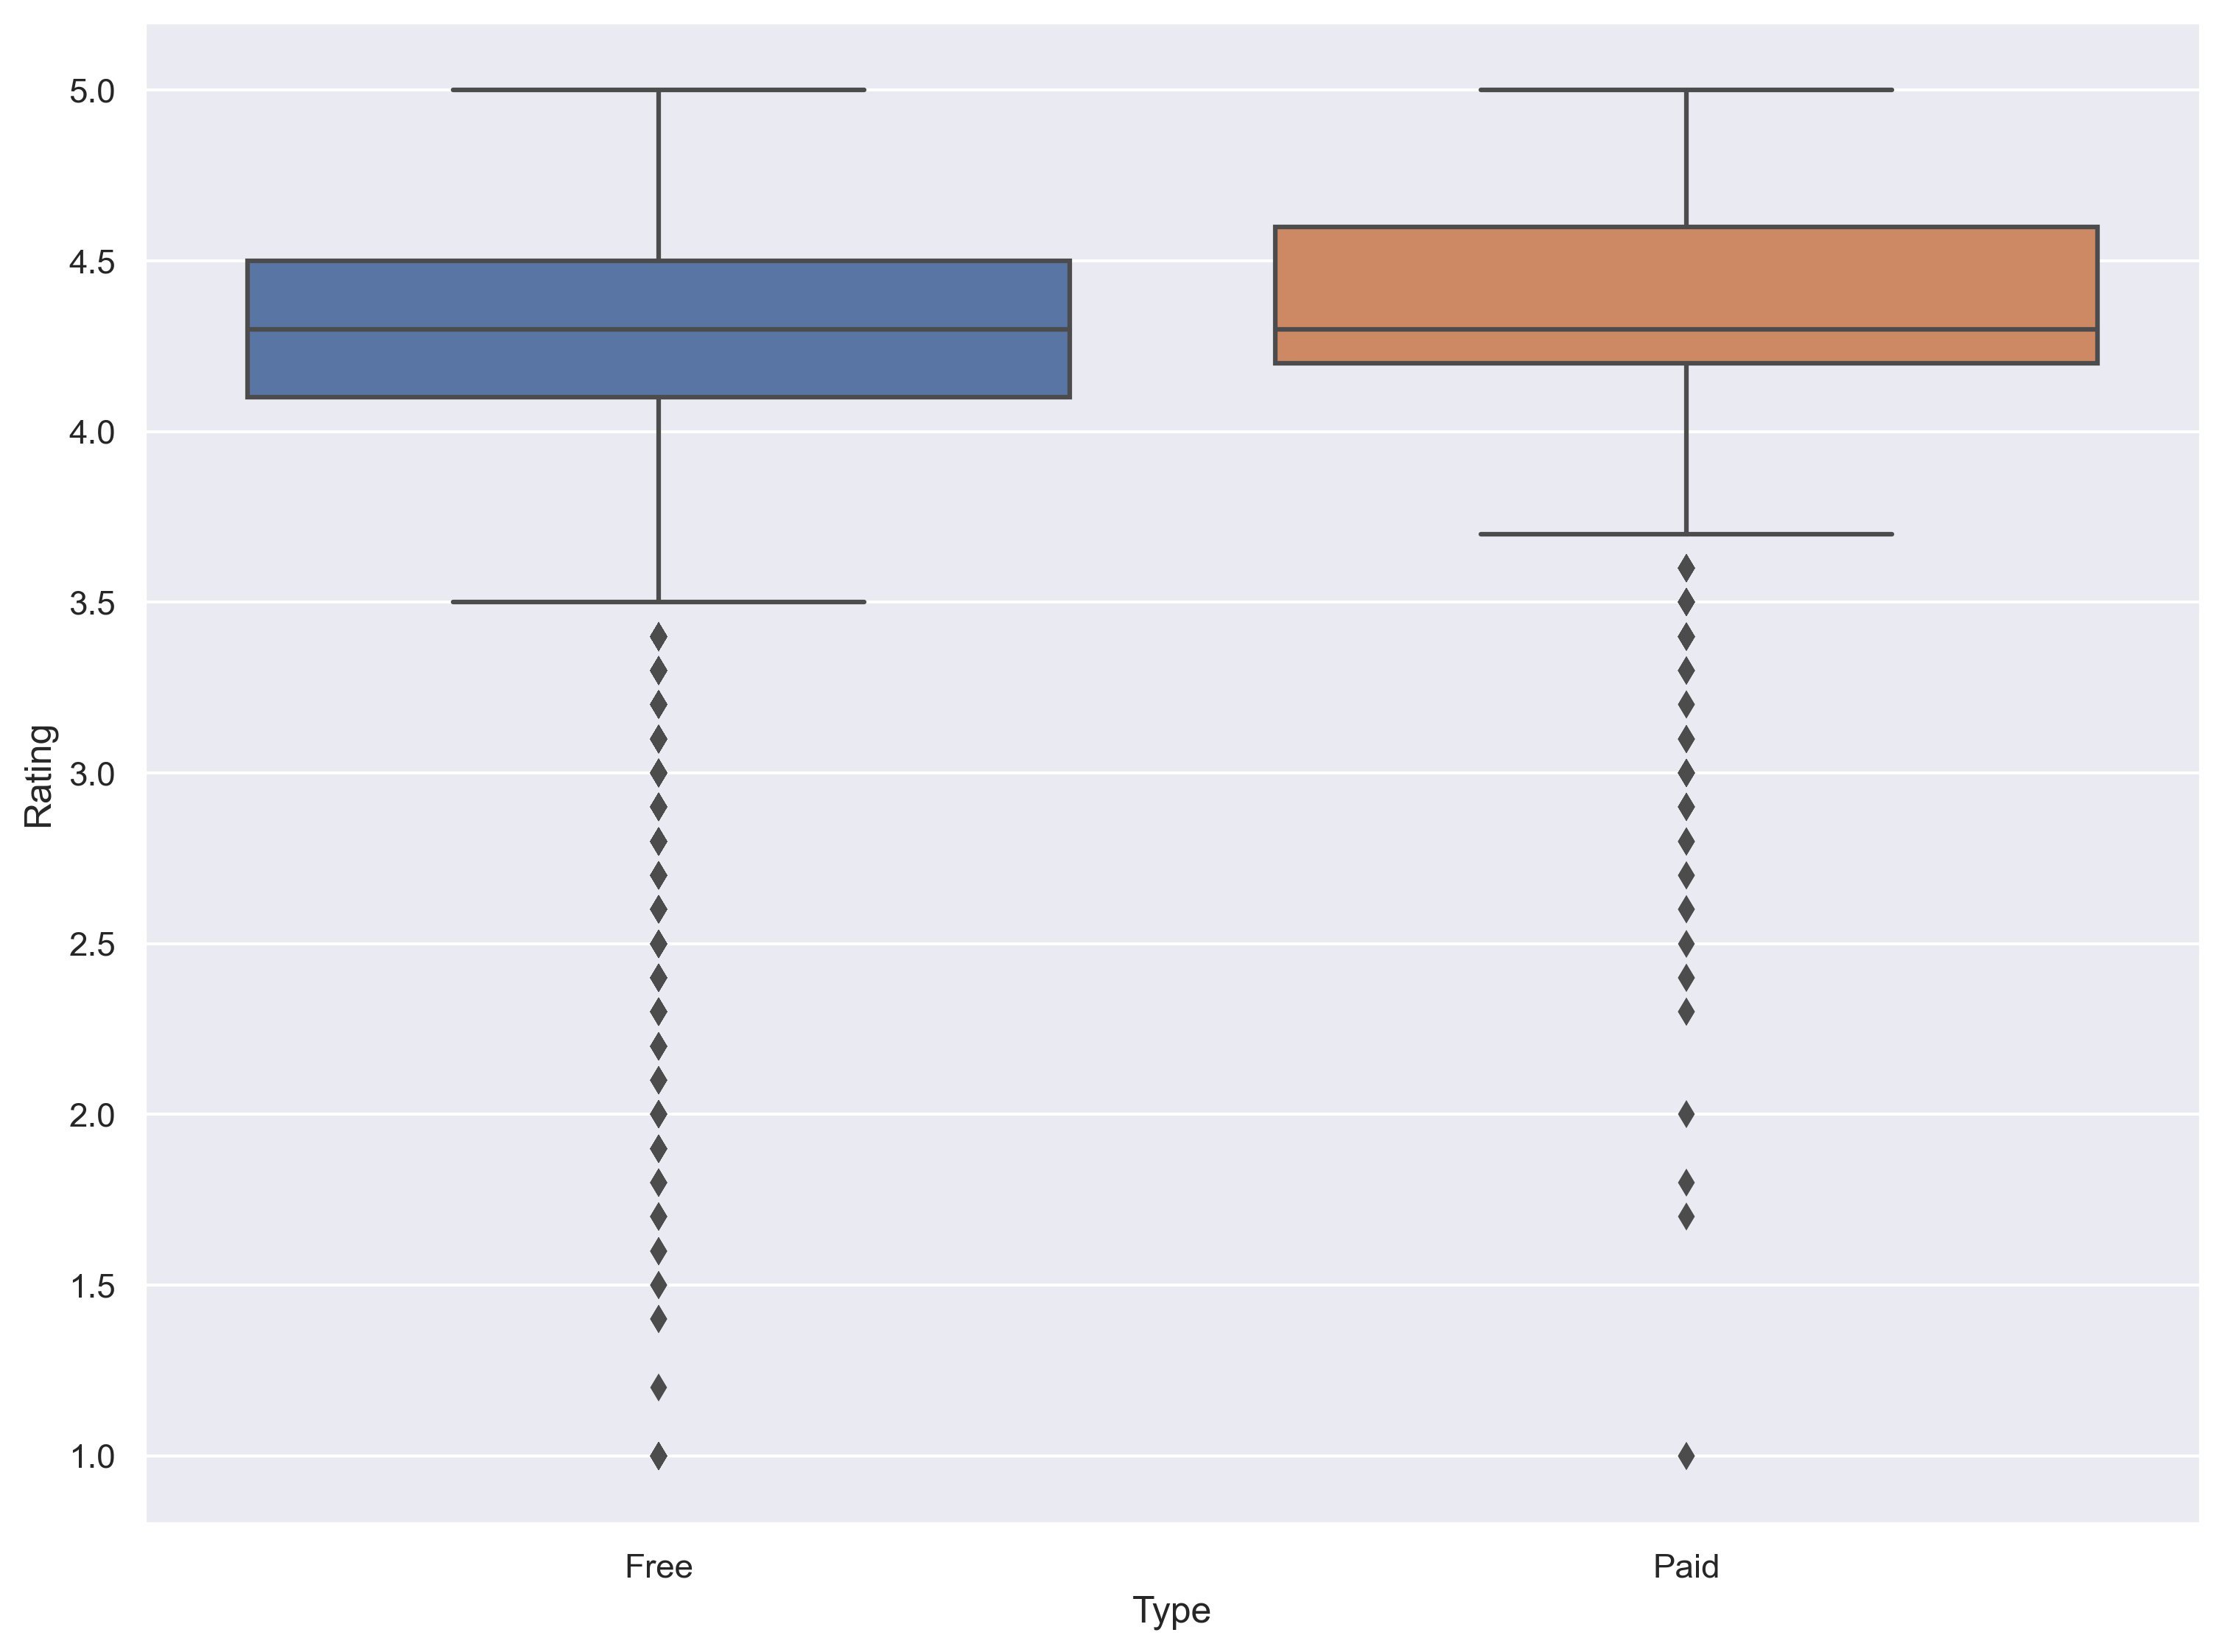

In [58]:
sns.boxplot(x = 'Type', y = 'Rating', data = df);

Kutu grafiğinde kutular verinin %25 ile %75 ini gösterir. Ortadaki çizgi medyanı ifade eder. Grafiğe göre ücretli uygulamaların reyting ortalamalarının daha fazla olduğunu görüyoruz.

> <mark><b>'Content_Rating' kolonunu inceleyelim ve bu kolonun kategorilerinin sayısını grafik üzerinde görelim.</b></mark>

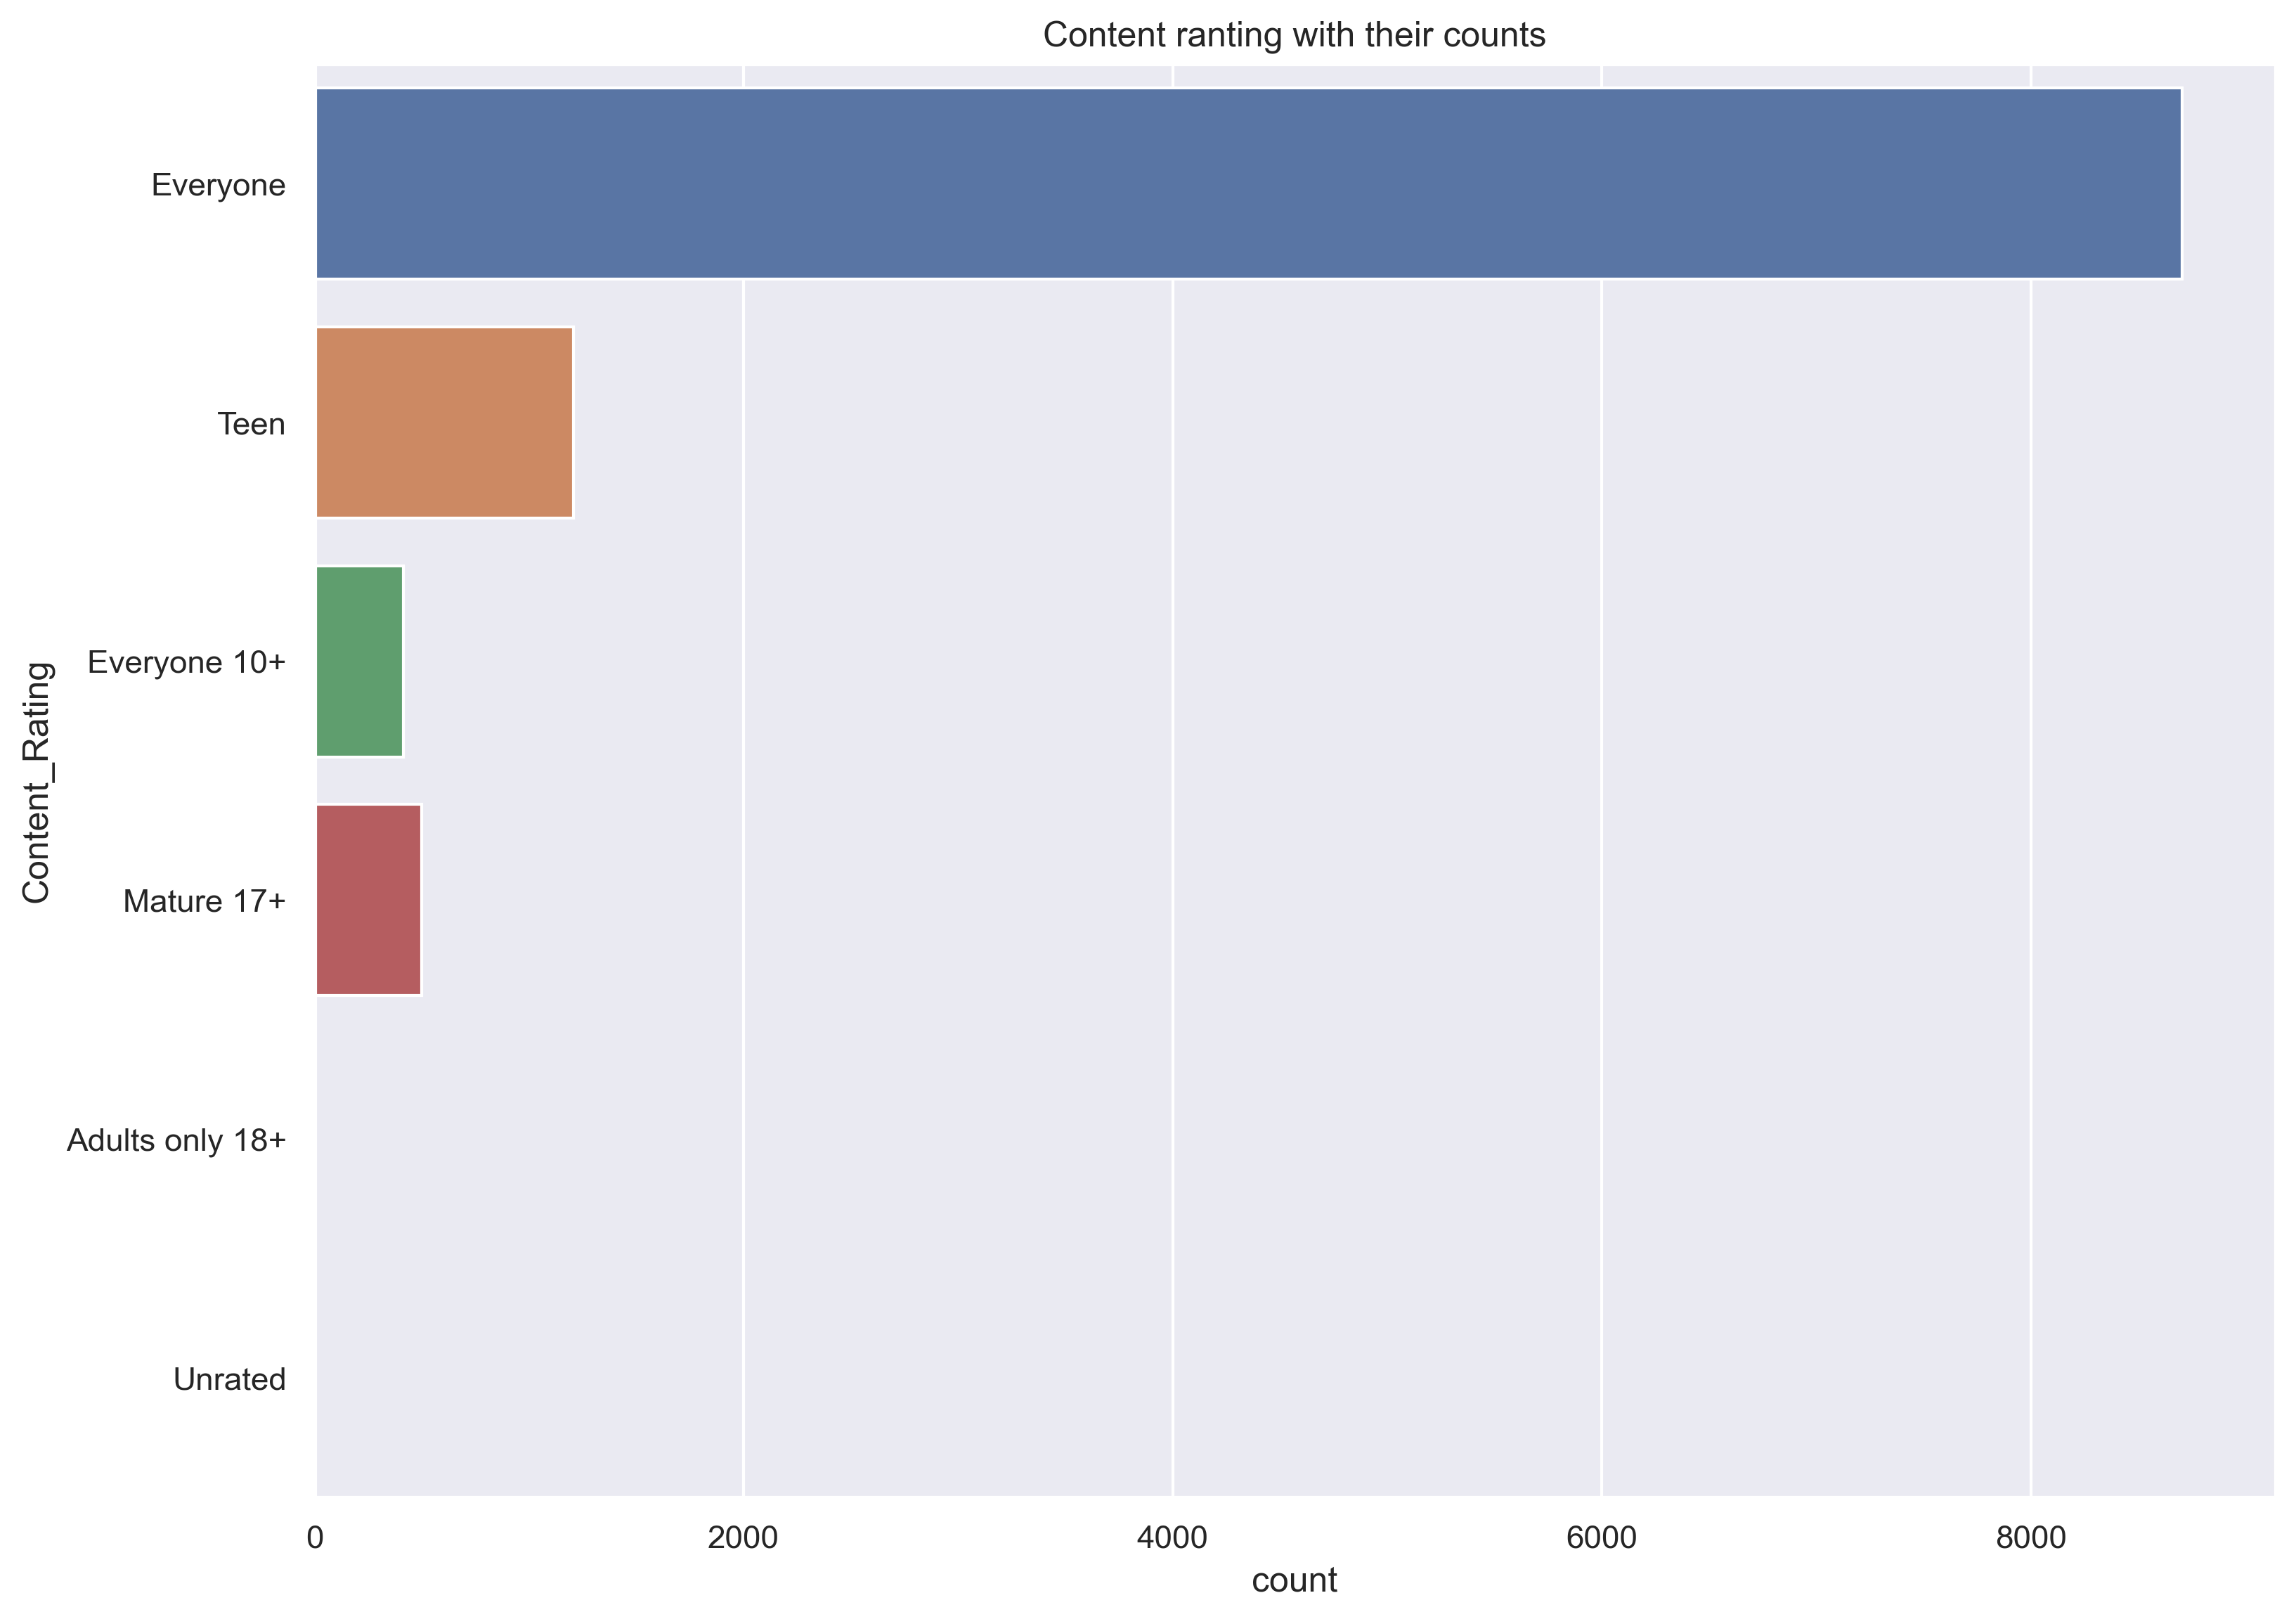

In [63]:
sns.countplot(y = 'Content_Rating', data=df) 
# countplot() otomatik olarak kategorilerin sayısını hesaplar.
plt.title("Content ranting with their counts");

Uygulamaların en çok hitap ettiği kesim 1. sırada **Everyone**(Herkes) sonra **Teen**(Gençler) geliyor.

> <mark><b>Uygulamaların bu gruplara göre reytinglerini görelim.</b></mark>

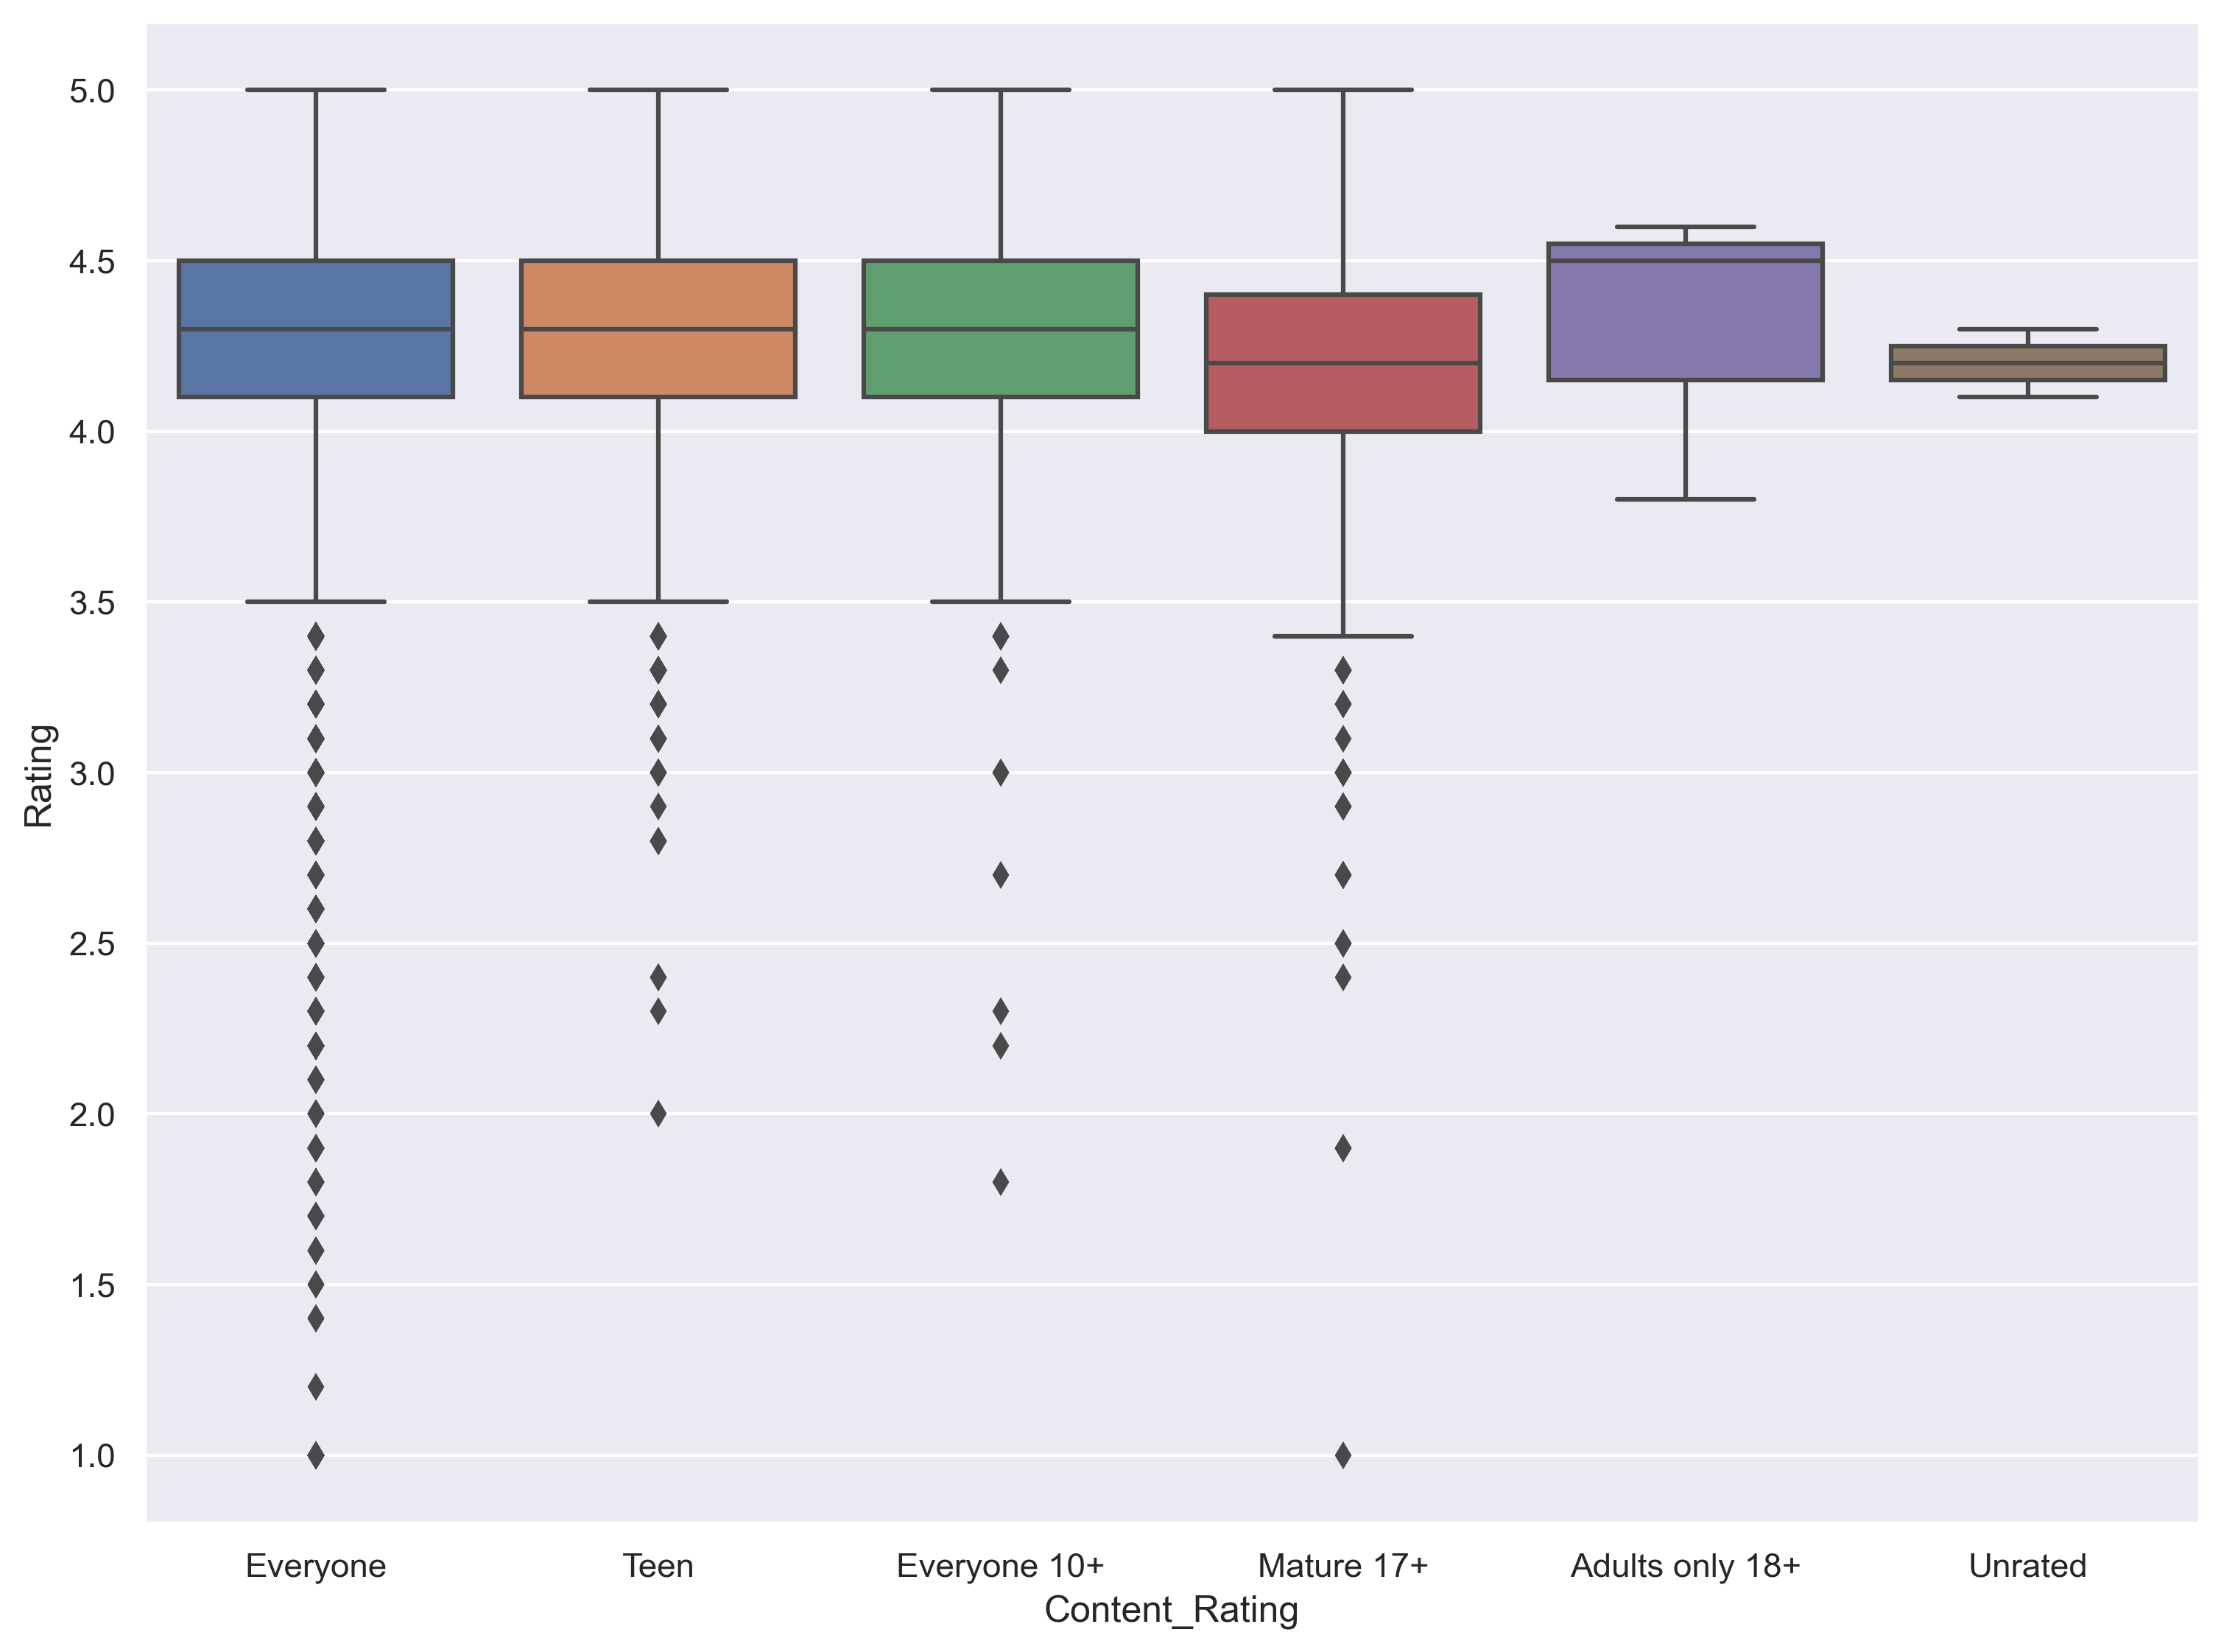

In [64]:
sns.boxplot(x = 'Content_Rating', y = 'Rating', data=df);

* Grafiğe baktığımızda Everyone, Teen ve Everyone 10+ kategorileri için Rating istatistiklerinin hemen hemen aynı olduğunu görüyoruz. Everyone kategorisinde aykırı değer daha fazla. Ayrıca bu kategorilerin medyanı ortalamaya yakın ve çeyrek açıklıkları da birbirine yakın. Dolayısıyla bu kategorilerin simetrik dağıldığını söyleyebiliriz. 
* Ortalama olarak en düşük reyting 'Mature 17+' sütunundadır. 
* 'Adults only 18+' kategorisinin reyting ortalaması diğerlerine göre biraz daha yüksek. Bu kategorinin üst çeyreğine düşen veri alt çeyreğine düşen veriden daha azdır ve medyanı ortalamadan daha yüksektir. Dolayısıyla bu kategorinin simetrik dağılmadığını söyleyebiliriz.


> <mark><b>Uygulamaların kategori sayısını bulalım.</b></mark>

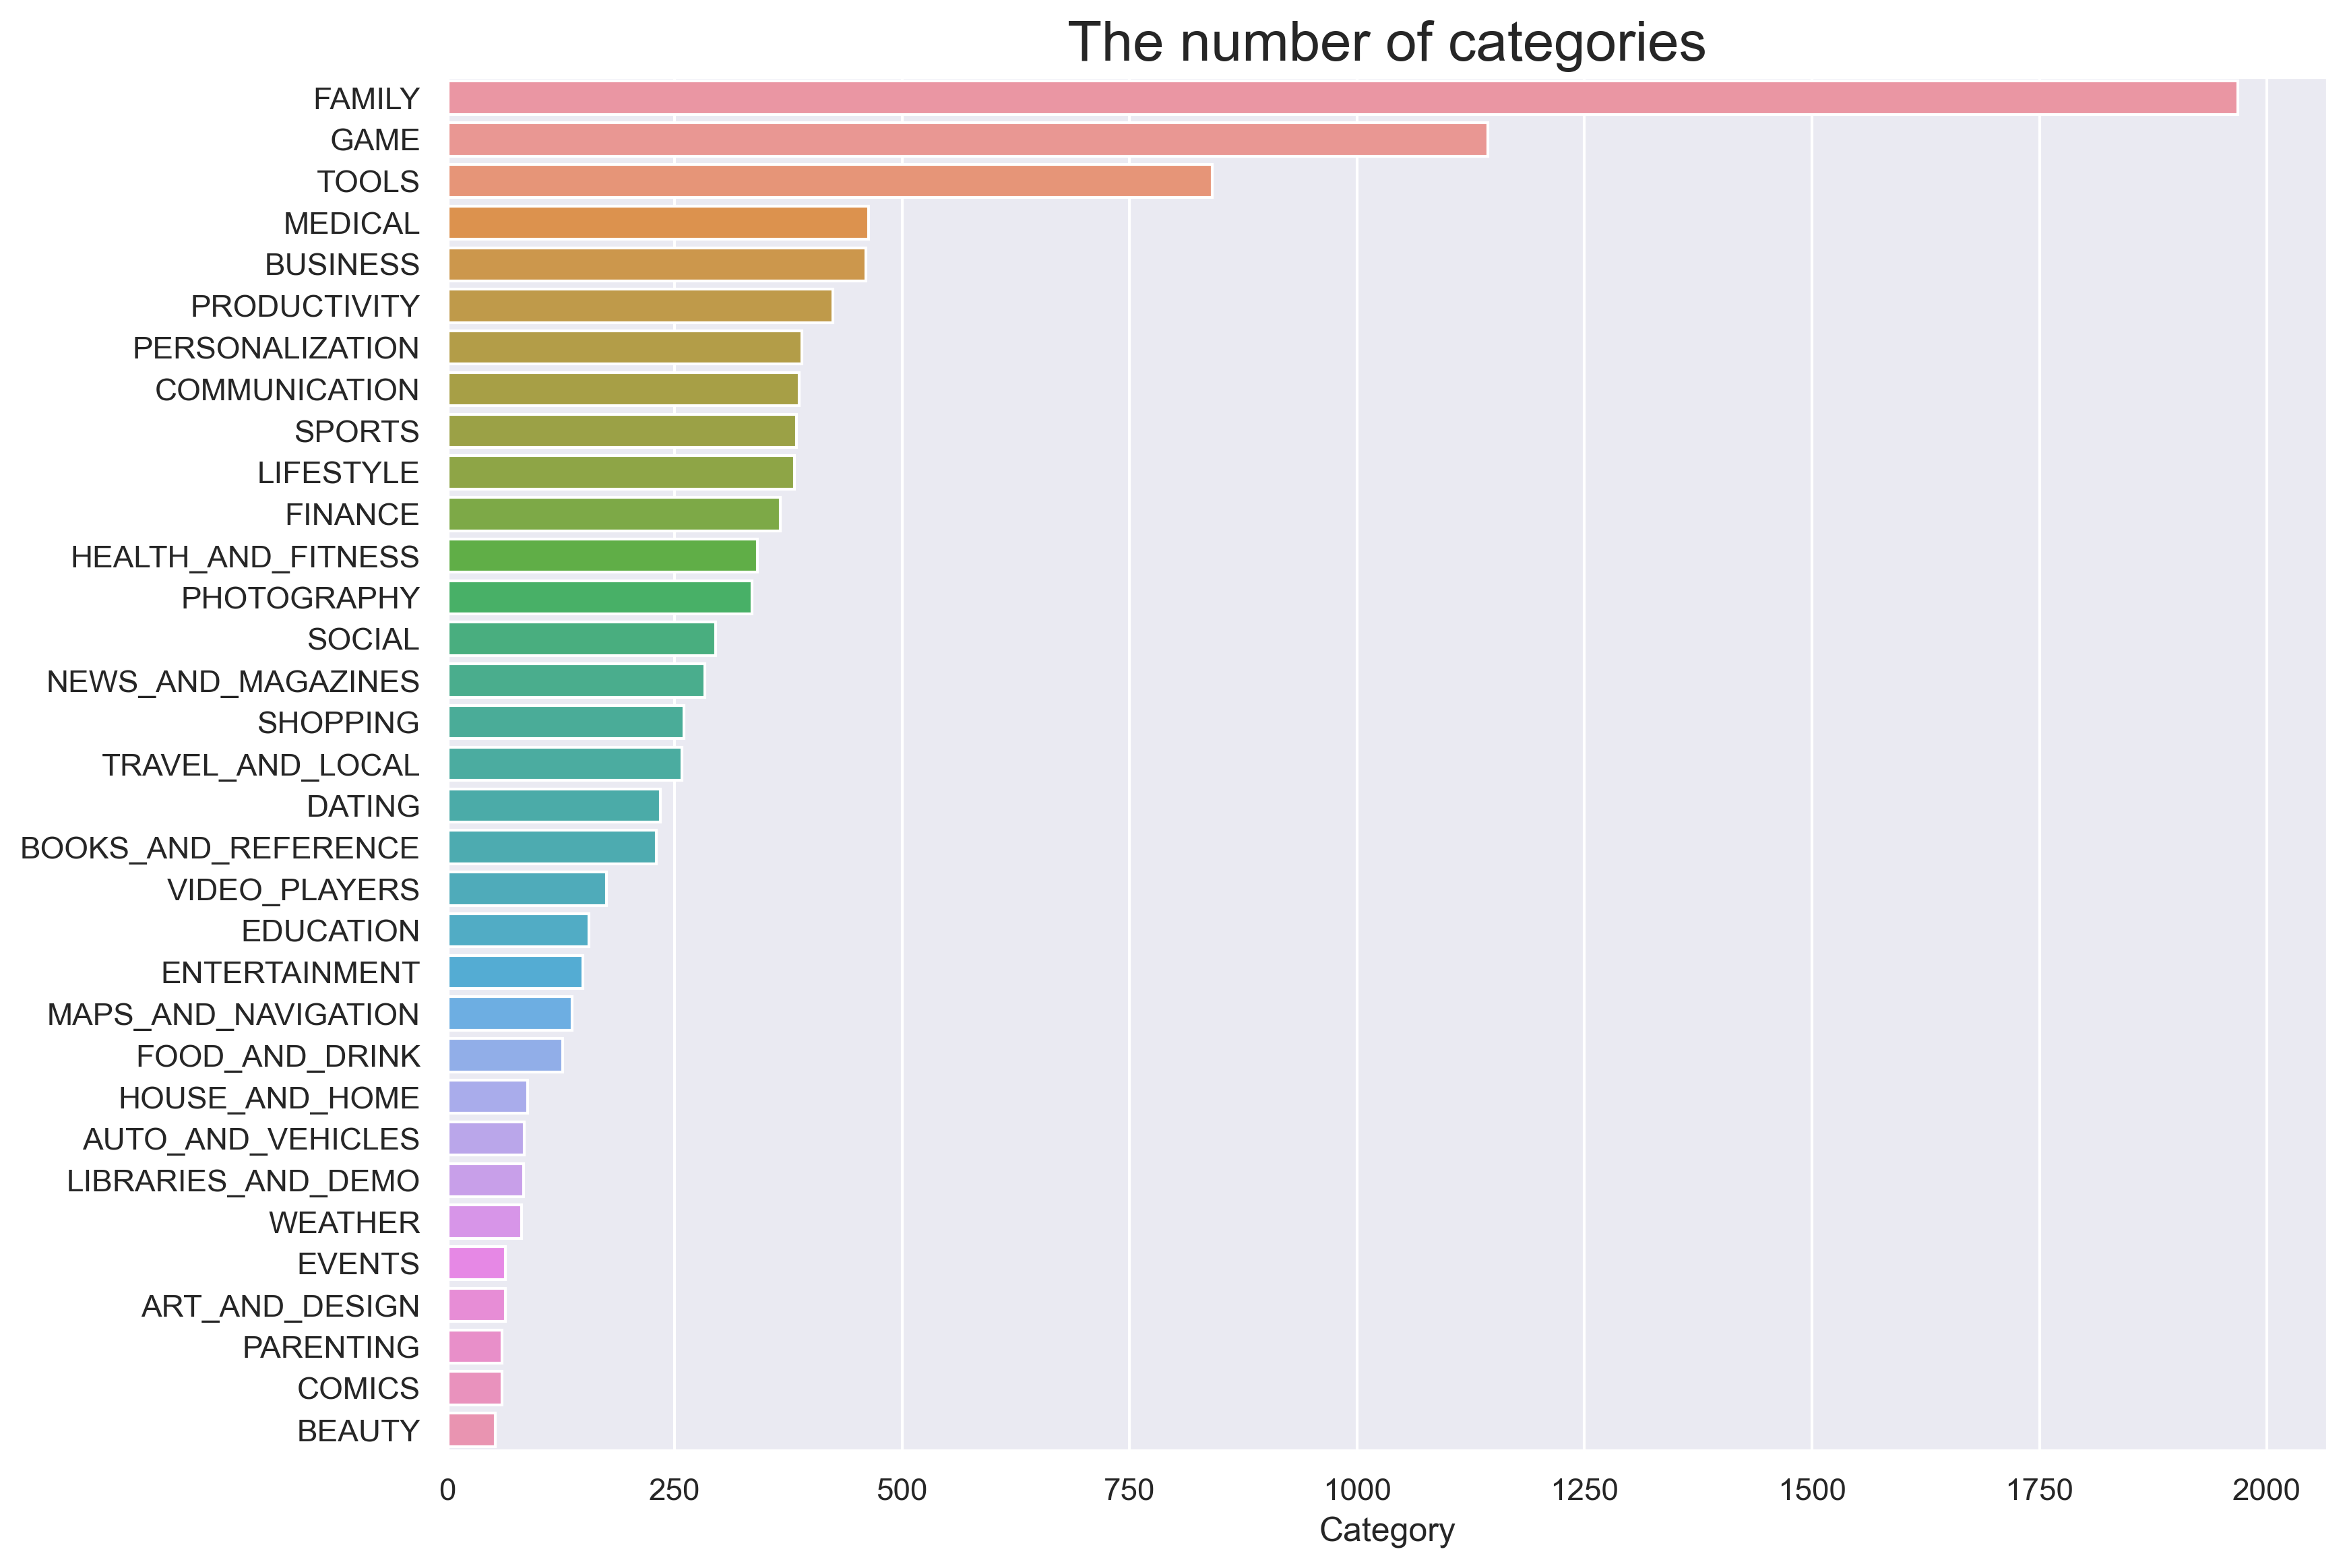

In [68]:
cat_num = df.Category.value_counts()
sns.barplot(x = cat_num, y = cat_num.index, data = df)
plt.title('The number of categories', size = 20);

Grafiğe baktığımızda en fazla uygulama aile kategorisindedir.

> <mark><b>En fazla para verilen kategorilere bakalım.</b></mark>

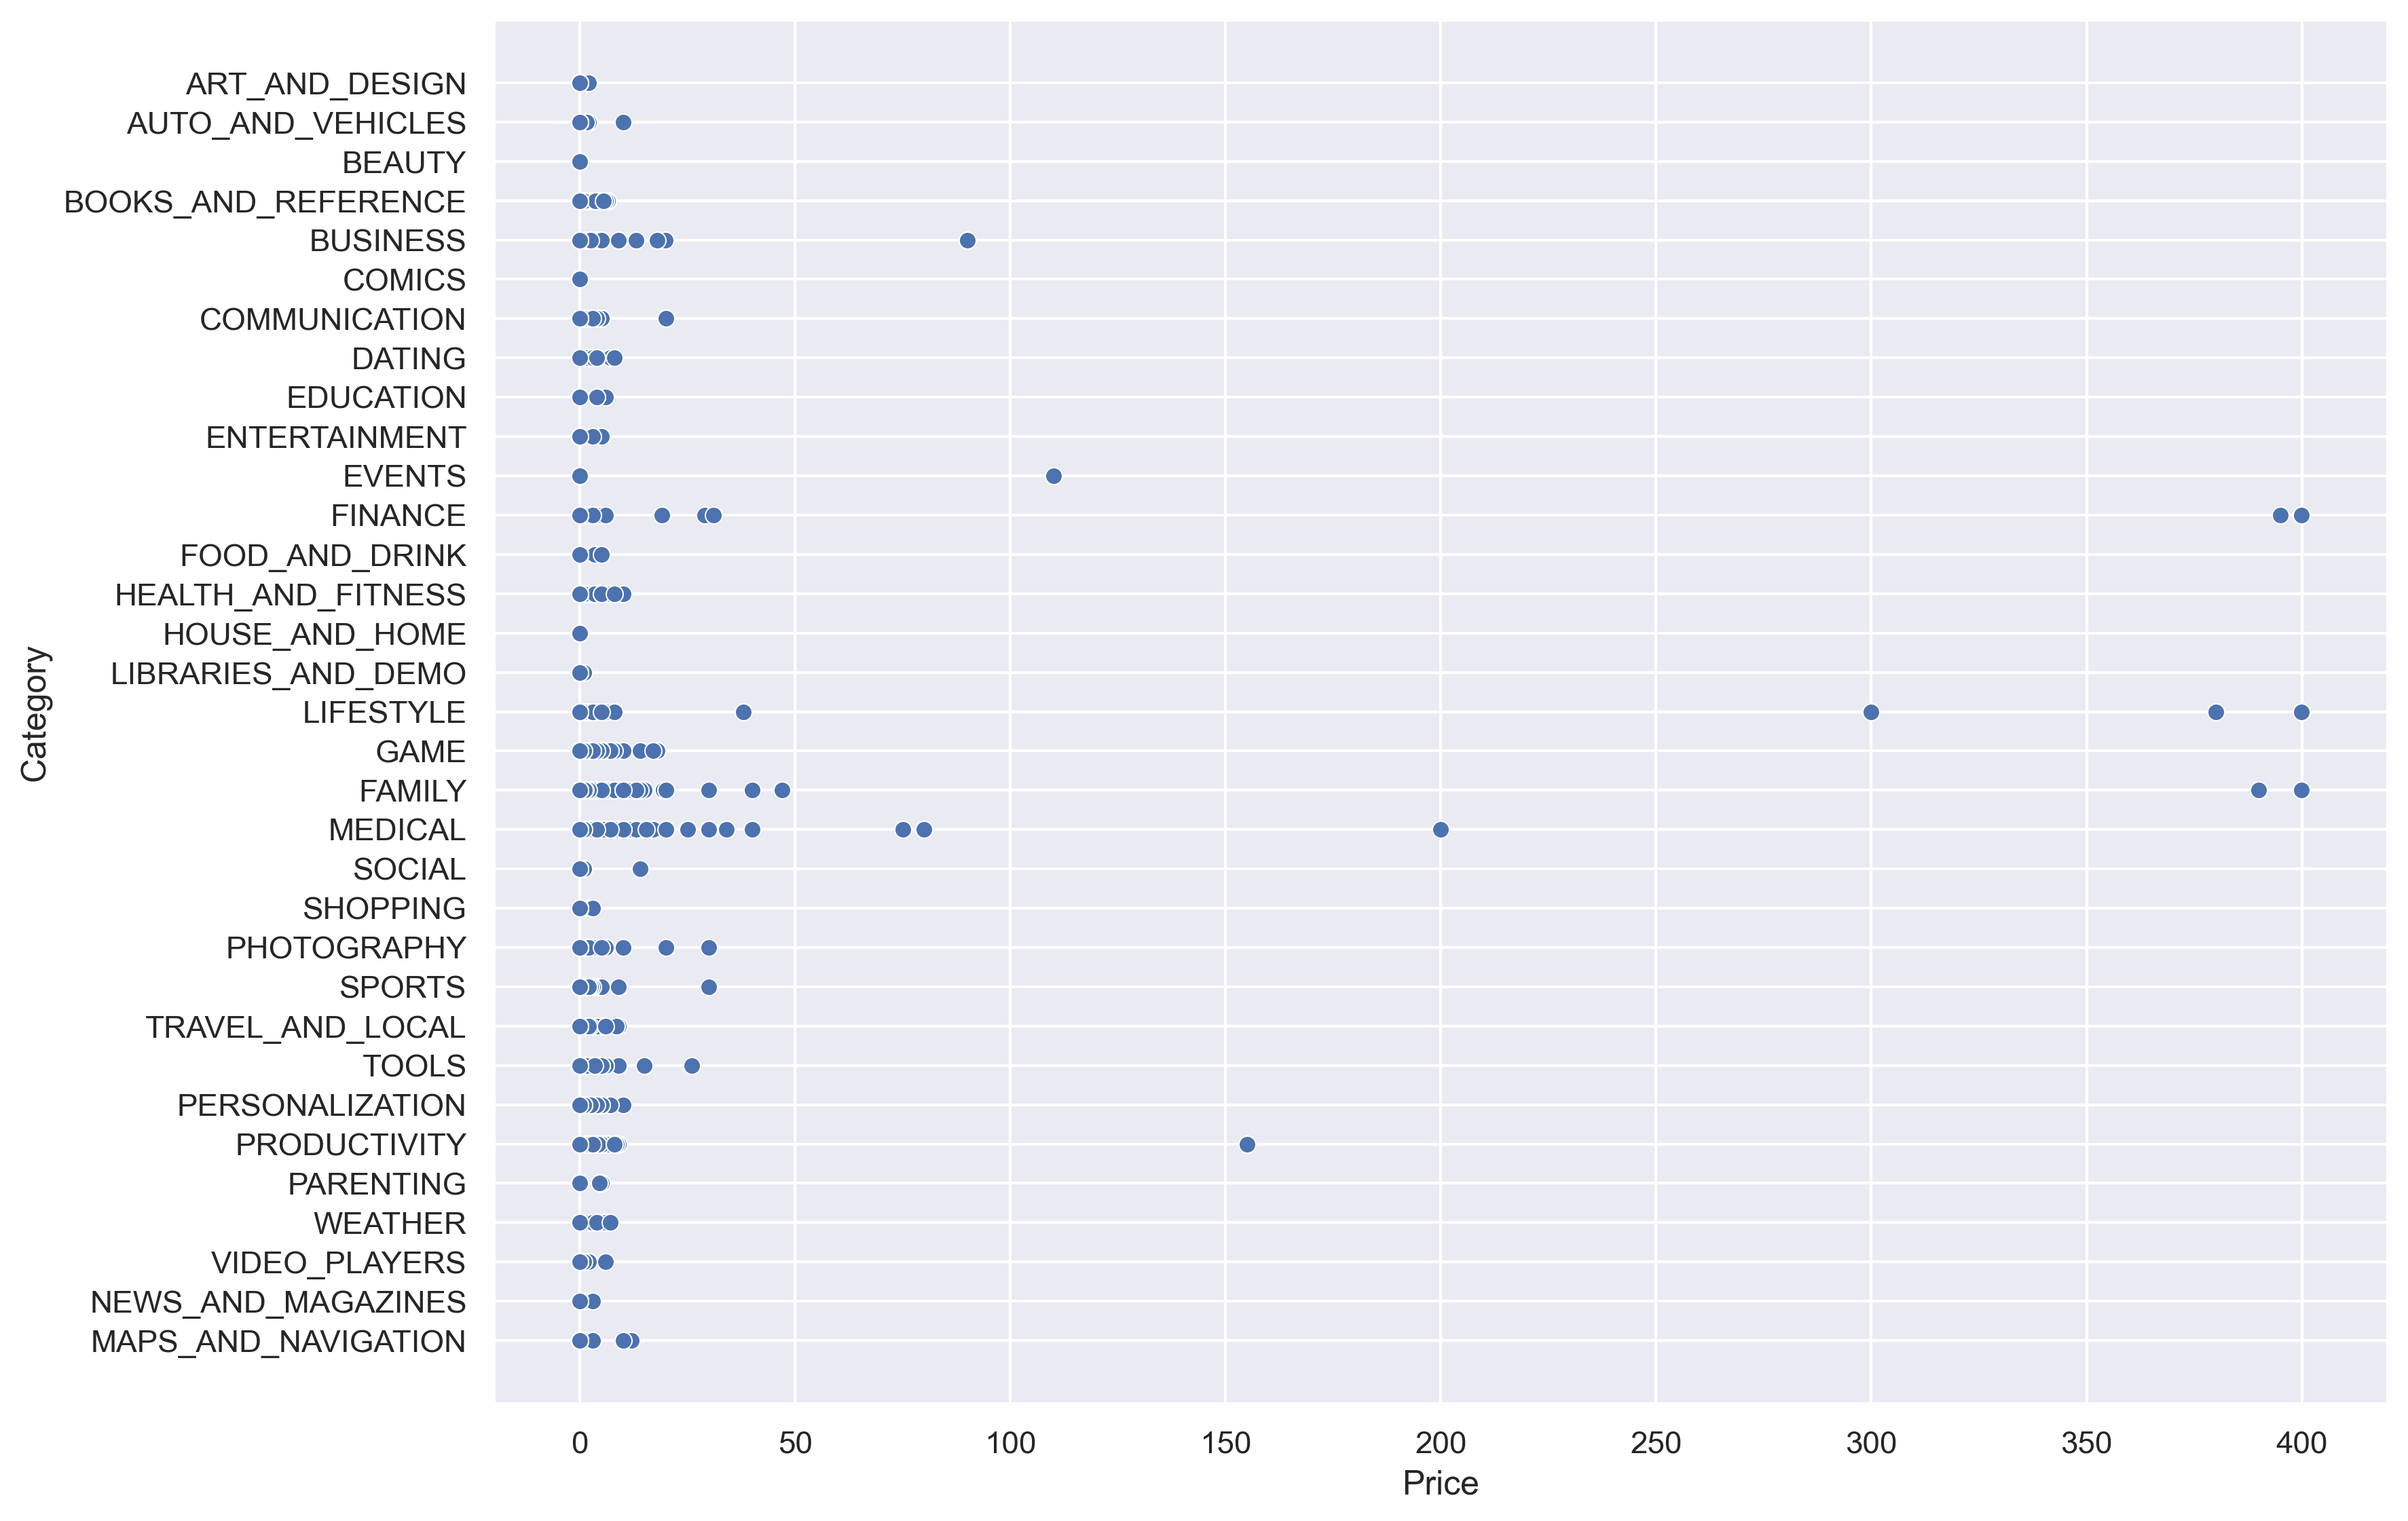

In [69]:
sns.scatterplot(data = df, y = 'Category', x = 'Price');

En yüksek para veilen uygulamalar **FINANCE, LIFESTYLE** ve **FAMILY** olarak karşımıza çıkıyor.

> <mark><b>Sayısal değişken arasındaki ilişkiye bakalım.</b></mark>

* Sayısal değişkenler arasındaki korelasyonu bulmak için **corr()** metodunu kullanıyoruz.
* Değişkenlerin isimlerinin yazılması için **annot=True** ifadesini kullanıyoruz.
* Hücreler arasındaki boşluk için **linewidths** özelliğini kullanıyoruz.
* Değerlerin yuvarlatılamsı için **fmt = '.2f'** özelliğini ekliyoruz.

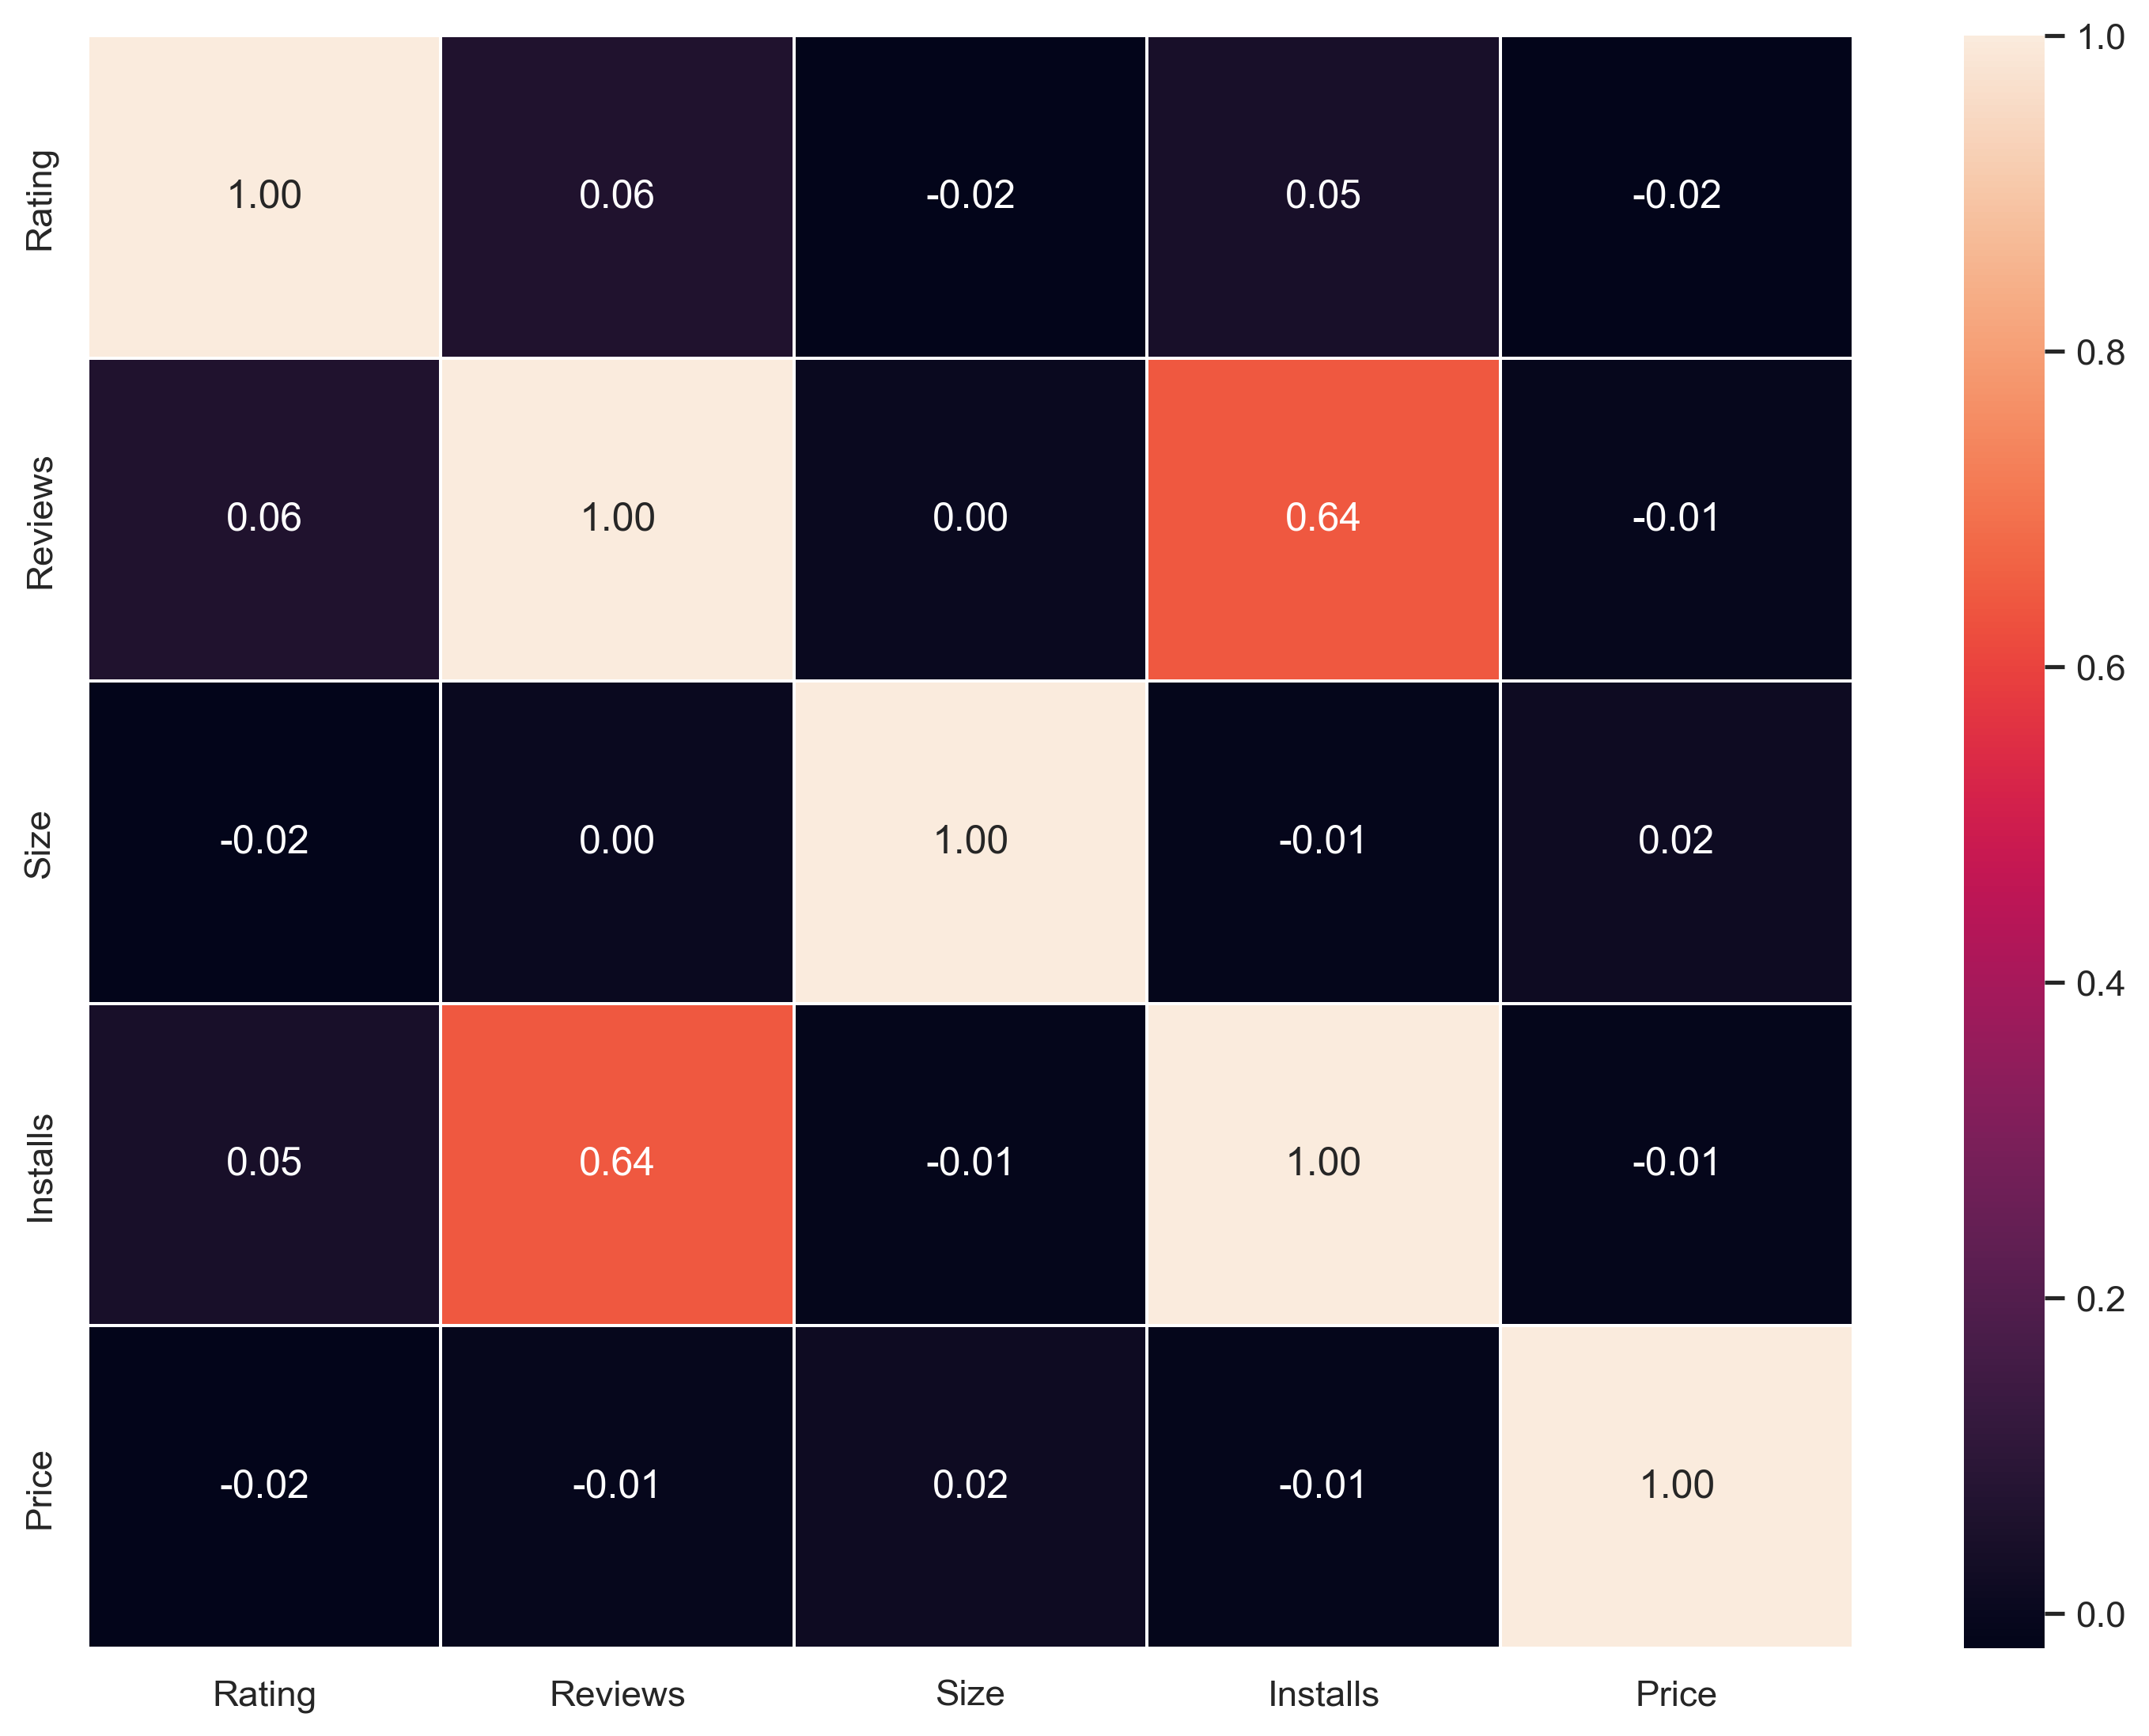

In [70]:
sns.heatmap(df.corr(), annot = True, linewidths=.5, fmt = '.2f' );

Renkler açıklaştıkça iki değişken arasındaki ilişki artmaktadır. En fazla 0.64 değeri ile Installs-Reviews sütunları arasında ilişki vardır. Mantıken de bir uygulama ne kadar indirilmişse yorum sayısı da o kadar fazla olabilir. 

> <mark><b>Reyting dağılımına bakalım.</b></mark>

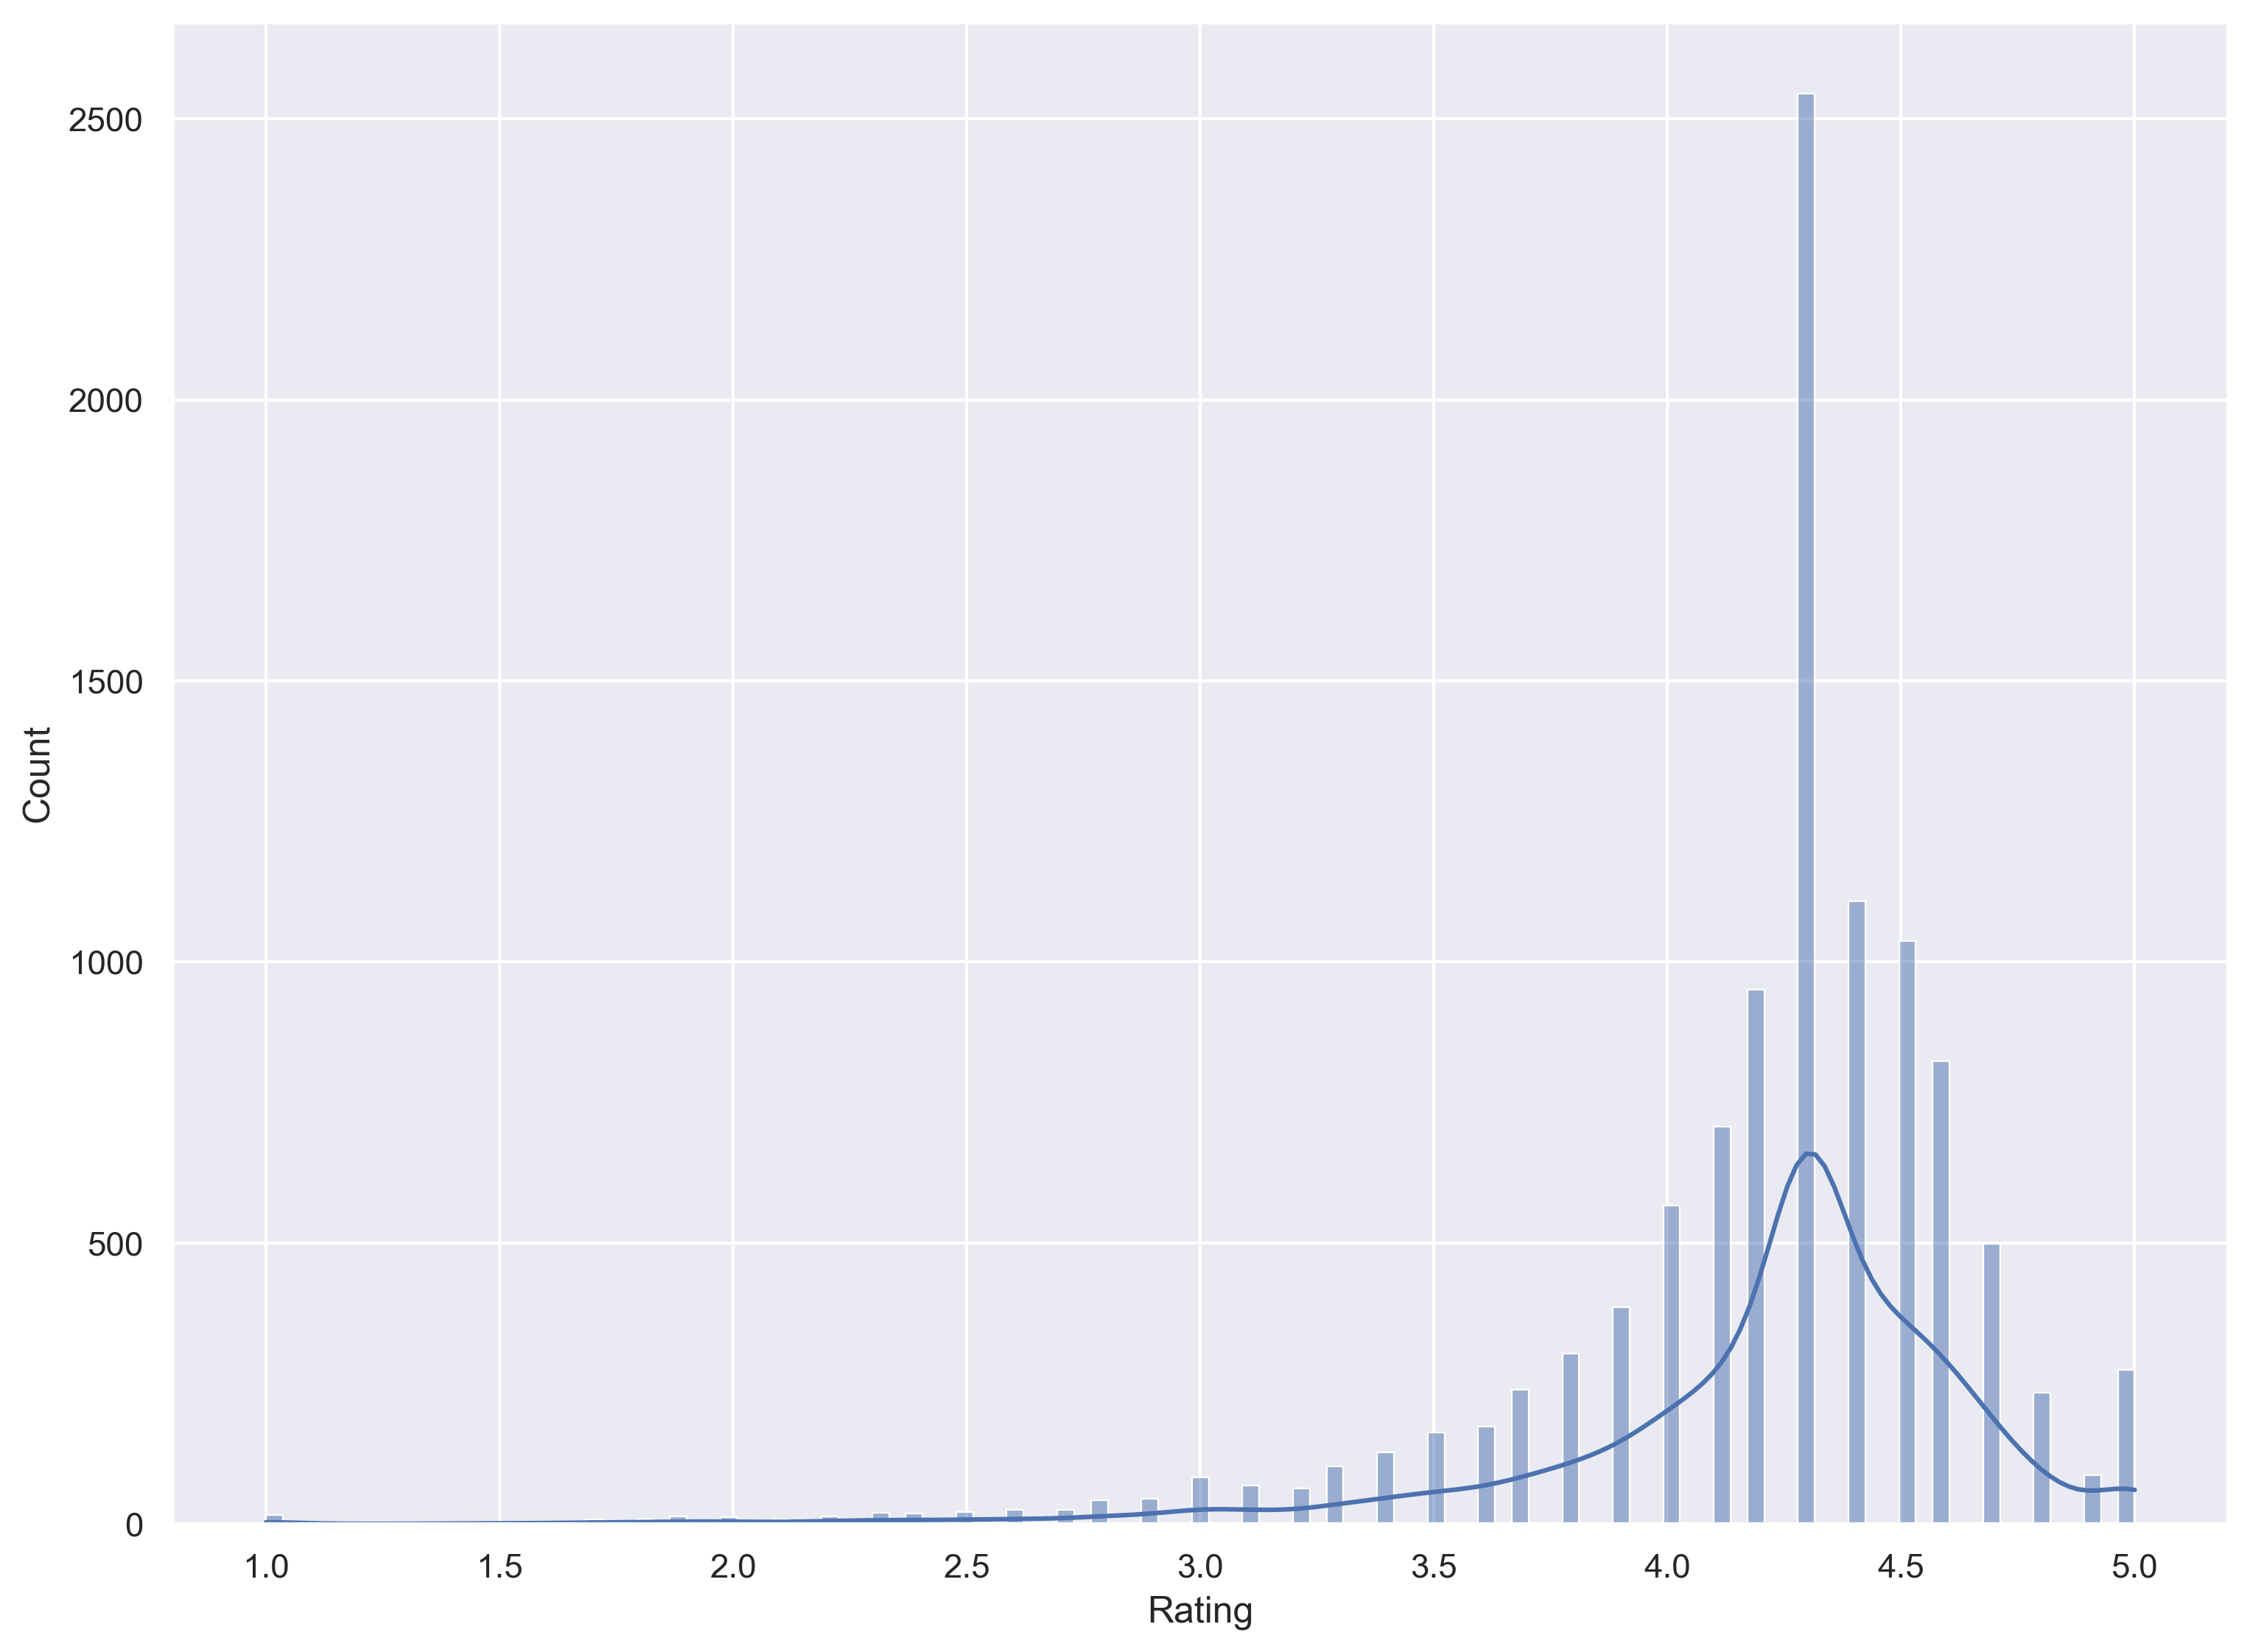

In [72]:
sns.histplot(df.Rating, kde = True);
# Dağılımı düzleştirmek için kernel olasılık tahmini eğrisini "kde=True" özelliğini kullanarak ekliyoruz.

Grafiğe baktığımızda en çok puanın 4.3 civarında olduğunu görebiliyoruz.